# Explorative Data Analysis

This notebook includes an explorative data analysis of the data sets for the following Common Vulnerabilities and Exposures (*CVE's*) and Common Vulnerability Enumerations (*CWE's*):
 - CVE-2012-2122
 - CVE-2014-0160 
 - CVE-2017-12635-6
 - CVE-2018-3760
 - CVE-2019-5418
 - CVE-2020-9484
 - CVE-2020-13942
 - CVE-2020-23839
 - CWE-89-SQL-injection

For further information on each *CVE* and how the data sets were gathered please refer to https://github.com/LID-DS/LID-DS/wiki/Scenarios

The main goal is to be able to record CVE-2020-18392 and detect DoS via CPU- and Memory-Usage https://cwe.mitre.org/data/definitions/674.html


In [58]:
# Imports
import sys
sys.path.append("..")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from model.helpers import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [55]:
# load all the data
TRAIN = {}
TEST = {}
VALIDATION = {}

path = "../../data/interim/raw"
train = "train_"
test = "test_"
validation = "validation_"
#  list of scenarios
scenarios = [
        'CVE-2012-2122',
        'CVE-2014-0160',
        'CVE-2017-7529',
        'CVE-2017-12635_6',
        'CVE-2018-3760',
        'CVE-2019-5418',
        'CVE-2020-9484',
        'CVE-2020-13942',
        'CVE-2020-23839',
        'CWE-89-SQL-injection'
]

for i in range(0,len(scenarios)):
    TRAIN[scenarios[i]]= pd.read_pickle(path + "/" + train + scenarios[i] + ".pkl")
    TEST[scenarios[i]] = pd.read_pickle(path + "/" + test + scenarios[i] + ".pkl")
    VALIDATION[scenarios[i]] = pd.read_pickle(path + "/" + validation + scenarios[i] + ".pkl")
            

In [3]:
# create empty list do concenate everything at the end
dfs_train = []
# create a column for each scenario name
for key in TRAIN.keys():
    TRAIN[key]['scenario'] = key
    temp_df = TRAIN[key]
    dfs_train.append(temp_df)
TRAIN['ALL'] = pd.concat(dfs_train)

dfs_test = []
for key in TEST.keys():
    TEST[key]['scenario'] = key
    temp_df = TEST[key]
    dfs_test.append(temp_df)
TEST['ALL'] = pd.concat(dfs_test)

dfs_validation = []
for key in VALIDATION.keys():
    VALIDATION[key]['scenario'] = key
    temp_df = VALIDATION[key]
    dfs_validation.append(temp_df)
VALIDATION['ALL'] = pd.concat(dfs_validation)


For all data scenarios we will focus on the features *cpu_usage* and *memory_usage*.

In [4]:
# Train Data 
train = TRAIN['ALL']
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit,timestamp_container_ready,timestamp_warmup_end,container_name,dates,times,scenario
timestamp,,,,,,,,,,,,,
2021-09-14 00:55:36.149,0.002020,84160512,0,0,0,0,False,2021-09-14 00:55:33.138913,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:36.149000,CVE-2012-2122
2021-09-14 00:55:37.153,0.092346,85045248,5605,4919,0,16384,False,2021-09-14 00:55:33.138913,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:37.153000,CVE-2012-2122
2021-09-14 00:55:38.156,0.079045,86081536,4731,4031,0,28672,False,2021-09-14 00:55:33.138913,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:38.156000,CVE-2012-2122
2021-09-14 00:55:39.159,0.057994,86700032,3495,3087,0,20480,False,2021-09-14 00:55:33.138913,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:39.159000,CVE-2012-2122
2021-09-14 00:55:40.162,0.066642,87162880,3025,2642,0,40960,False,2021-09-14 00:55:33.138913,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:40.162000,CVE-2012-2122


In [5]:
# Test Data 
test = TEST['ALL']
test.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit,timestamp_container_ready,timestamp_warmup_end,container_name,dates,times,scenario
timestamp,,,,,,,,,,,,,
2021-09-13 16:11:26.915,0.043767,84586496,2495,2133,0,16384,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:26.915000,CVE-2012-2122
2021-09-13 16:11:27.920,0.029553,84815872,1621,1141,0,8192,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:27.920000,CVE-2012-2122
2021-09-13 16:11:28.925,0.008983,84832256,405,231,0,4096,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:28.925000,CVE-2012-2122
2021-09-13 16:11:29.931,0.025969,85037056,1433,1293,0,16384,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:29.931000,CVE-2012-2122
2021-09-13 16:11:30.936,0.053534,85245952,2328,1988,0,45056,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:30.936000,CVE-2012-2122


In [6]:
# Observations per scenario Train
train.groupby('scenario')['cpu_usage'].count()

scenario
CVE-2012-2122           9616
CVE-2014-0160           9544
CVE-2017-12635_6        9393
CVE-2017-7529           9452
CVE-2018-3760           9472
CVE-2019-5418           9591
CVE-2020-13942          9594
CVE-2020-23839          9564
CVE-2020-9484           9577
CWE-89-SQL-injection    9514
Name: cpu_usage, dtype: int64

In [7]:
# each sceanrio contains recordings which lasted between 45 and 46 seconds
train.groupby(['scenario', 'container_name']).count()

cpu_usage  memory_usage  \
scenario             container_name                                       
CVE-2012-2122        acidic_kilby_9548                 46            46   
                     acidic_pare_2330                  46            46   
                     acidic_roentgen_1933              46            46   
                     aggressive_curran_4092            46            46   
                     agreeable_archimedes_3925         46            46   
...                                                   ...           ...   
CWE-89-SQL-injection lively_lehmann_8192               45            45   
                     nutty_wing_1648                   45            45   
                     refined_shockley_8233             46            46   
                     some_buck_8820                    46            46   
                     uninterested_clarke_2189          45            45   

                                                network_received  \
scenario             container_name                                
CVE-2012-2122        acidic_kilby_9548                        46   
                     acidic_pare_2330                         46   
                     acidic_roentgen_1933                     46   
                     aggressive_curran_4092                   46   
                     agreeable_archimedes_3925                46   
...                                                          ...   
CWE-89-SQL-injection lively_lehmann_8192                      45   
                     nutty_wing_1648                          45   
                     refined_shockley_8233                    46   
                     some_buck_8820                           46   
                     uninterested_clarke_2189                 45   

                                                network_send  storage_read  \
scenario             container_name                                          
CVE-2012-2122        acidic_kilby_9548                    46            46   
                     acidic_pare_2330                     46            46   
                     acidic_roentgen_1933                 46            46   
                     aggressive_curran_4092               46            46   
                     agreeable_archimedes_3925            46            46   
...                                                      ...           ...   
CWE-89-SQL-injection lively_lehmann_8192                  45            45   
                     nutty_wing_1648                      45            45   
                     refined_shockley_8233                46            46   
                     some_buck_8820                       46            46   
                     uninterested_clarke_2189             45            45   

                                                storage_written  exploit  \
scenario             container_name                                        
CVE-2012-2122        acidic_kilby_9548                       46       46   
                     acidic_pare_2330                        46       46   
                     acidic_roentgen_1933                    46       46   
                     aggressive_curran_4092                  46       46   
                     agreeable_archimedes_3925               46       46   
...                                                         ...      ...   
CWE-89-SQL-injection lively_lehmann_8192                     45       45   
                     nutty_wing_1648                         45       45   
                     refined_shockley_8233                   46       46   
                     some_buck_8820                          46       46   
                     uninterested_clarke_2189                45       45   

                                                timestamp_container_ready  \
scenario             container_name                                         
CVE-2012-2122        acidic_k

In [8]:
# Observations per scenario Test 
test.groupby('scenario')['cpu_usage'].count()

scenario
CVE-2012-2122           129280
CVE-2014-0160            36983
CVE-2017-12635_6         37406
CVE-2017-7529            35230
CVE-2018-3760            35721
CVE-2019-5418            37263
CVE-2020-13942           36797
CVE-2020-23839           39927
CVE-2020-9484            37853
CWE-89-SQL-injection     38616
Name: cpu_usage, dtype: int64

In [9]:
# Observations by scenario and exploit to see obervations
grouped = test.groupby(['scenario', 'exploit'])['cpu_usage'].count()
grouped

scenario              exploit
CVE-2012-2122         False      34886
                      True       94394
CVE-2014-0160         False      34400
                      True        2583
CVE-2017-12635_6      False      33981
                      True        3425
CVE-2017-7529         False      32768
                      True        2462
CVE-2018-3760         False      33239
                      True        2482
CVE-2019-5418         False      34744
                      True        2519
CVE-2020-13942        False      34363
                      True        2434
CVE-2020-23839        False      34621
                      True        5306
CVE-2020-9484         False      34603
                      True        3250
CWE-89-SQL-injection  False      34371
                      True        4245
Name: cpu_usage, dtype: int64

In [10]:
# Different length of recordings than in train data 
test.groupby(['scenario', 'container_name']).count()

cpu_usage  memory_usage  \
scenario             container_name                                       
CVE-2012-2122        abundant_driscoll_5366            46            46   
                     abundant_thompson_6318            28            28   
                     alive_clarke_6898                 17            17   
                     ambitious_williamson_5906         31            31   
                     angry_gould_5160                  30            30   
...                                                   ...           ...   
CWE-89-SQL-injection young_margulis_1109               45            45   
                     young_mccarthy_3243               38            38   
                     yummy_golick_9343                 45            45   
                     yummy_torvalds_2272               45            45   
                     zealous_fermat_3810               45            45   

                                                network_received  \
scenario             container_name                                
CVE-2012-2122        abundant_driscoll_5366                   46   
                     abundant_thompson_6318                   28   
                     alive_clarke_6898                        17   
                     ambitious_williamson_5906                31   
                     angry_gould_5160                         30   
...                                                          ...   
CWE-89-SQL-injection young_margulis_1109                      45   
                     young_mccarthy_3243                      38   
                     yummy_golick_9343                        45   
                     yummy_torvalds_2272                      45   
                     zealous_fermat_3810                      45   

                                                network_send  storage_read  \
scenario             container_name                                          
CVE-2012-2122        abundant_driscoll_5366               46            46   
                     abundant_thompson_6318               28            28   
                     alive_clarke_6898                    17            17   
                     ambitious_williamson_5906            31            31   
                     angry_gould_5160                     30            30   
...                                                      ...           ...   
CWE-89-SQL-injection young_margulis_1109                  45            45   
                     young_mccarthy_3243                  38            38   
                     yummy_golick_9343                    45            45   
                     yummy_torvalds_2272                  45            45   
                     zealous_fermat_3810                  45            45   

                                                storage_written  exploit  \
scenario             container_name                                        
CVE-2012-2122        abundant_driscoll_5366                  46       46   
                     abundant_thompson_6318                  28       28   
                     alive_clarke_6898                       17       17   
                     ambitious_williamson_5906               31       31   
                     angry_gould_5160                        30       30   
...                                                         ...      ...   
CWE-89-SQL-injection young_margulis_1109                     45       45   
                     young_mccarthy_3243                     38       38   
                     yummy_golick_9343                       45       45   
                     yummy_torvalds_2272                     45       45   
                     zealous_fermat_3810                     45       45   

                                                timestamp_container_ready  \
scenario             container_name                                         
CVE-2012-2122        abundant

In [11]:
# Differentiate between exploit == False and True
test.groupby(['scenario', 'container_name', 'exploit']).count()

cpu_usage  \
scenario             container_name            exploit              
CVE-2012-2122        abundant_driscoll_5366    False           46   
                     abundant_thompson_6318    True            28   
                     alive_clarke_6898         True            17   
                     ambitious_williamson_5906 True            31   
                     angry_gould_5160          True            30   
...                                                           ...   
CWE-89-SQL-injection young_margulis_1109       False           45   
                     young_mccarthy_3243       True            38   
                     yummy_golick_9343         False           45   
                     yummy_torvalds_2272       False           45   
                     zealous_fermat_3810       False           45   

                                                        memory_usage  \
scenario             container_name            exploit                 
CVE-2012-2122        abundant_driscoll_5366    False              46   
                     abundant_thompson_6318    True               28   
                     alive_clarke_6898         True               17   
                     ambitious_williamson_5906 True               31   
                     angry_gould_5160          True               30   
...                                                              ...   
CWE-89-SQL-injection young_margulis_1109       False              45   
                     young_mccarthy_3243       True               38   
                     yummy_golick_9343         False              45   
                     yummy_torvalds_2272       False              45   
                     zealous_fermat_3810       False              45   

                                                        network_received  \
scenario             container_name            exploit                     
CVE-2012-2122        abundant_driscoll_5366    False                  46   
                     abundant_thompson_6318    True                   28   
                     alive_clarke_6898         True                   17   
                     ambitious_williamson_5906 True                   31   
                     angry_gould_5160          True                   30   
...                                                                  ...   
CWE-89-SQL-injection young_margulis_1109       False                  45   
                     young_mccarthy_3243       True                   38   
                     yummy_golick_9343         False                  45   
                     yummy_torvalds_2272       False                  45   
                     zealous_fermat_3810       False                  45   

                                                        network_send  \
scenario             container_name            exploit                 
CVE-2012-2122        abundant_driscoll_5366    False              46   
                     abundant_thompson_6318    True               28   
                     alive_clarke_6898         True               17   
                     ambitious_williamson_5906 True               31   
                     angry_gould_5160          True               30   
...                                                              ...   
CWE-89-SQL-injection young_margulis_1109       False              45   
                     young_mccarthy_3243       True               38   
                     yummy_golick_9343         False              45   
                     yummy_torvalds_2272       False              45   
                     zealous_fermat_3810       False              45   

                                                        storage_read  \
scenario             container_name            exploit                 
CVE-2012-2122        abundant_driscoll_5366    False              46   
                     abundant_thompson_6318    True               28   
       

## CVE-2012-2122 - Improperly checked token comparison leads to root database access with wrong password
Oracle MySQL, when running in certain environments with certain implementations of the memcmp function, allows remote attackers to bypass authentication by repeatedly authenticating with the same incorrect password, which eventually causes a token comparison to succeed due to an improperly-checked return value.

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/287.html*

In [12]:
# Train Data 
train[train['scenario']=='CVE-2012-2122'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9616.000000,9.616000e+03,9616.000000,9616.000000,9616.0,9.616000e+03
mean,0.046468,8.913908e+07,2401.877808,2019.730241,0.0,2.551702e+05
std,0.030050,2.597509e+06,1391.642114,1210.435235,0.0,8.308880e+05
min,0.001545,8.386560e+07,0.000000,0.000000,0.0,0.000000e+00
25%,0.027246,8.736768e+07,1427.000000,1124.000000,0.0,1.228800e+04
50%,0.041891,8.911667e+07,2293.000000,1928.000000,0.0,2.048000e+04
75%,0.058723,9.100083e+07,3288.000000,2769.250000,0.0,3.276800e+04
max,0.255300,9.763635e+07,8997.000000,8230.000000,0.0,6.791168e+06


In [13]:
# Test Data exploit=False
test[(test['scenario']=='CVE-2012-2122')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,370682.000000,3.706820e+05,3.706820e+05,3.706820e+05,3.706820e+05,3.706820e+05
mean,1.490214,4.578809e+08,9.507726e+03,5.714573e+04,7.996041e+02,5.092070e+04
std,4.543465,9.274226e+08,6.083458e+04,2.982635e+05,2.966963e+04,2.998671e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.026346,3.738829e+07,1.066000e+03,1.263000e+03,0.000000e+00,0.000000e+00
50%,0.137832,1.081283e+08,3.807000e+03,9.369000e+03,0.000000e+00,0.000000e+00
75%,1.261520,2.769213e+08,8.865000e+03,2.275100e+04,0.000000e+00,1.228800e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [14]:
# Test data exploit ==True
test[(test['scenario']=='CVE-2012-2122')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,94394.000000,9.439400e+04,94394.000000,94394.000000,94394.0,9.439400e+04
mean,0.086294,1.409528e+08,2044.037089,1826.813579,0.0,1.009749e+05
std,0.135588,4.392635e+07,9897.044242,9701.485338,0.0,4.234027e+05
min,0.001462,8.380006e+07,0.000000,0.000000,0.0,0.000000e+00
25%,0.002743,1.032602e+08,0.000000,0.000000,0.0,0.000000e+00
50%,0.033783,1.331978e+08,1181.000000,1034.000000,0.0,4.096000e+03
75%,0.116705,1.716797e+08,2744.000000,2342.000000,0.0,2.048000e+04
max,1.514378,2.348974e+08,251104.000000,248040.000000,0.0,7.086080e+06


## CVE-2014-0160 - Heartbleed
TLS implementation in OpenSSL 1.0.1 before 1.0.1g have a mishandling of Heartbeat Extension packets. This mishandling leads to a possible process memory information leak if using a crafted packet. In detail a buffer over-read is triggered when communicating with server.

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/119.html*

In [15]:
train[train['scenario']=='CVE-2014-0160'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9544.000000,9.544000e+03,9544.000000,9544.000000,9544.000000,9544.0
mean,0.013391,1.329014e+07,6618.270746,5273.066220,860.056999,0.0
std,0.017972,2.248793e+06,9463.606014,8281.851158,12083.291146,0.0
min,0.000052,8.990720e+06,0.000000,0.000000,0.000000,0.0
25%,0.000174,1.231258e+07,0.000000,0.000000,0.000000,0.0
50%,0.000471,1.310310e+07,296.000000,42.000000,0.000000,0.0
75%,0.021397,1.428378e+07,10969.000000,7862.250000,0.000000,0.0
max,0.137517,3.192013e+07,86604.000000,78038.000000,651264.000000,0.0


In [16]:
test[(test['scenario']=='CVE-2014-0160')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,462493.000000,4.624930e+05,4.624930e+05,4.624930e+05,4.624930e+05,4.624930e+05
mean,1.211925,3.956913e+08,8.000711e+03,4.612750e+04,6.408721e+02,6.142107e+04
std,4.106281,8.398099e+08,5.472372e+04,2.679714e+05,2.656388e+04,3.302194e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.014680,8.622080e+07,5.910000e+02,5.790000e+02,0.000000e+00,0.000000e+00
50%,0.104427,1.162363e+08,3.025000e+03,4.097000e+03,0.000000e+00,0.000000e+00
75%,0.577556,2.348810e+08,6.980000e+03,1.810000e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [17]:
test[(test['scenario']=='CVE-2014-0160')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,2583.000000,2.583000e+03,2583.000000,2583.000000,2583.0,2583.0
mean,0.013400,1.116010e+07,6587.346883,8396.284940,0.0,0.0
std,0.018035,1.498372e+06,9783.075871,16665.812014,0.0,0.0
min,0.000057,9.003008e+06,0.000000,0.000000,0.0,0.0
25%,0.000362,9.318400e+06,0.000000,0.000000,0.0,0.0
50%,0.000446,1.155891e+07,677.000000,42.000000,0.0,0.0
75%,0.022700,1.266893e+07,11053.000000,10566.500000,0.0,0.0
max,0.202224,1.410253e+07,68843.000000,120207.000000,0.0,0.0


## CVE-2017-7529 - Integer Overflow Vulnerability in nginx leading to data leak

Nginx versions since 0.5.6 up to and including 1.13.2 are vulnerable to integer overflow vulnerability in nginx range filter module resulting into leak of potentially sensitive information triggered by specially crafted request.

**Technical Impact:** DoS: Crash, Exit, or Restart; DoS: Resource Consumption (CPU); DoS: Resource Consumption (Memory); DoS: Instability

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/190.html*

In [18]:
train[train['scenario']=='CVE-2017-7529'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9452.000000,9.452000e+03,9452.000000,9.452000e+03,9.452000e+03,9452.0
mean,0.002944,3.487099e+06,2517.601989,2.202612e+05,4.380709e+03,0.0
std,0.010183,1.487041e+06,8480.266826,7.854147e+05,8.169819e+04,0.0
min,0.000000,2.736128e+06,0.000000,0.000000e+00,0.000000e+00,0.0
25%,0.000000,2.879488e+06,0.000000,0.000000e+00,0.000000e+00,0.0
50%,0.000000,2.904064e+06,0.000000,0.000000e+00,0.000000e+00,0.0
75%,0.000000,3.031040e+06,107.000000,0.000000e+00,0.000000e+00,0.0
max,0.134487,1.314406e+07,105884.000000,9.804452e+06,2.592768e+06,0.0


In [19]:
test[(test['scenario']=='CVE-2017-7529')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,462614.000000,4.626140e+05,4.626140e+05,4.626140e+05,4.626140e+05,4.626140e+05
mean,1.211636,3.956341e+08,7.998851e+03,4.433005e+04,6.240677e+02,6.140501e+04
std,4.105782,8.397030e+08,5.470872e+04,2.572788e+05,2.616032e+04,3.301777e+05
min,0.000000,2.748416e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.014861,8.619213e+07,5.910000e+02,5.790000e+02,0.000000e+00,0.000000e+00
50%,0.104357,1.162281e+08,3.038000e+03,4.102000e+03,0.000000e+00,0.000000e+00
75%,0.577225,2.348810e+08,7.011000e+03,1.805500e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,9.803420e+06,3.993600e+06,7.127040e+06


In [20]:
test[(test['scenario']=='CVE-2017-7529')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,2462.000000,2.462000e+03,2462.000000,2.462000e+03,2.462000e+03,2462.0
mean,0.008744,3.012690e+06,6867.389927,3.442867e+05,3.126070e+03,0.0
std,0.022255,5.134119e+05,16201.105253,9.820628e+05,6.292216e+04,0.0
min,0.000000,2.740224e+06,0.000000,0.000000e+00,0.000000e+00,0.0
25%,0.000000,2.842624e+06,0.000000,0.000000e+00,0.000000e+00,0.0
50%,0.000000,2.891776e+06,107.000000,0.000000e+00,0.000000e+00,0.0
75%,0.001133,2.936832e+06,1027.750000,1.318300e+04,0.000000e+00,0.0
max,0.187500,6.586368e+06,129544.000000,1.224930e+07,2.023424e+06,0.0


## CVE-2017-12635_6 - CouchDB-Scenario

Running CouchDB server with remote code execution and possible privilege escalation listed as CVE-2017-12635 and CVE-2017-12636. First the privilege escalation is used to get admin rights and with these rights configurations can be made to enable remote code execution. 

**CVE-2017-12635:** Due to differences in the Erlang-based JSON parser and JavaScript-based JSON parser, it is possible in Apache CouchDB before 1.7.0 and 2.x before 2.1.1 to submit _users documents with duplicate keys for 'roles' used for access control within the database, including the special case '_admin' role, that denotes administrative users. In combination with CVE-2017-12636 (Remote Code Execution), this can be used to give non-admin users access to arbitrary shell commands on the server as the database system user. The JSON parser differences result in behaviour that if two 'roles' keys are available in the JSON, the second one will be used for authorising the document write, but the first 'roles' key is used for subsequent authorization for the newly created user. By design, users can not assign themselves roles. The vulnerability allows non-admin users to give themselves admin privileges.

**CVE-2017-12636:** CouchDB administrative users can configure the database server via HTTP(S). Some of the configuration options include paths for operating system-level binaries that are subsequently launched by CouchDB. This allows an admin user in Apache CouchDB before 1.7.0 and 2.x before 2.1.1 to execute arbitrary shell commands as the CouchDB user, including downloading and executing scripts from the public internet.

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/269.html & https://cwe.mitre.org/data/definitions/78.html*

In [21]:
train[train['scenario']=='CVE-2017-12635_6'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9393.000000,9.393000e+03,9393.000000,9393.000000,9393.000000,9393.000000
mean,0.318582,9.753155e+07,3462.190674,10925.216757,376.763973,15164.313851
std,0.216462,2.346059e+06,3816.925273,13264.863942,7081.693479,19236.572662
min,0.025187,9.297101e+07,0.000000,0.000000,0.000000,0.000000
25%,0.156371,9.620685e+07,87.000000,0.000000,0.000000,0.000000
50%,0.270230,9.710387e+07,2112.000000,9095.000000,0.000000,0.000000
75%,0.421116,9.831629e+07,5129.000000,15977.000000,0.000000,24576.000000
max,1.740202,1.142252e+08,32630.000000,98555.000000,282624.000000,159744.000000


In [22]:
test[(test['scenario']=='CVE-2017-12635_6')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,461651.000000,4.616510e+05,461651.000000,4.616510e+05,4.616510e+05,4.616510e+05
mean,1.208014,3.957293e+08,7044.491908,4.526718e+04,5.249417e+02,6.135726e+04
std,4.109116,8.406831e+08,15560.477463,2.638300e+05,2.338592e+04,3.305204e+05
min,0.000000,2.740224e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.013678,8.508621e+07,591.000000,5.780000e+02,0.000000e+00,0.000000e+00
50%,0.101524,1.162813e+08,3015.000000,4.044000e+03,0.000000e+00,0.000000e+00
75%,0.567439,2.348810e+08,7007.000000,1.803000e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,536060.000000,1.224930e+07,2.957312e+06,7.127040e+06


In [23]:
test[(test['scenario']=='CVE-2017-12635_6')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,3425.000000,3.425000e+03,3.425000e+03,3.425000e+03,3.425000e+03,3425.000000
mean,0.835210,1.005790e+08,1.358222e+05,1.336335e+05,1.578365e+04,23700.592117
std,1.395011,4.186422e+06,5.962085e+05,5.550915e+05,1.460991e+05,37663.443178
min,0.027270,9.307341e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.207832,9.725952e+07,2.840000e+02,5.840000e+02,0.000000e+00,0.000000
50%,0.353301,1.006182e+08,3.323000e+03,9.499000e+03,0.000000e+00,12288.000000
75%,0.581875,1.028506e+08,6.302000e+03,2.001200e+04,0.000000e+00,36864.000000
max,12.134629,1.257554e+08,3.811092e+06,3.561989e+06,3.993600e+06,266240.000000


## CVE-2018-3760 - Path Traversal Vulnerabilty in Sprockets leads to extraction of out of scope root files like /etc/passwd

There is an information leak vulnerability in the Sprockets asset serving system. Versions Affected: 4.0.0.beta7 and lower, 3.7.1 and lower, 2.12.4 and lower. Specially crafted requests can be used to access files that exists on the filesystem that is outside an application's root directory, when the Sprockets server is used in production.

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/200.html & https://cwe.mitre.org/data/definitions/22.html*

In [24]:
train[train['scenario']=='CVE-2018-3760'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9472.000000,9.472000e+03,9472.000000,9.472000e+03,9472.000000,9472.000000
mean,0.405180,1.167622e+08,7768.668919,1.506168e+05,89.513514,21401.081081
std,0.507610,4.753315e+06,12498.817046,3.785155e+05,2545.032941,30550.035017
min,0.000111,1.005814e+08,0.000000,0.000000e+00,0.000000,0.000000
25%,0.010554,1.161421e+08,834.000000,5.340000e+02,0.000000,0.000000
50%,0.207941,1.173463e+08,3176.000000,7.360500e+03,0.000000,0.000000
75%,0.576539,1.184072e+08,7545.500000,1.929025e+04,0.000000,32768.000000
max,4.838341,1.358152e+08,90287.000000,2.252858e+06,196608.000000,278528.000000


In [25]:
test[(test['scenario']=='CVE-2018-3760')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,462594.000000,4.625940e+05,4.625940e+05,4.625940e+05,4.625940e+05,4.625940e+05
mean,1.210054,3.950573e+08,7.987008e+03,4.493093e+04,6.385274e+02,6.133310e+04
std,4.106194,8.399554e+08,5.471484e+04,2.660507e+05,2.654328e+04,3.301922e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.014248,8.520909e+07,5.910000e+02,5.780000e+02,0.000000e+00,0.000000e+00
50%,0.102775,1.160520e+08,3.017000e+03,4.045000e+03,0.000000e+00,0.000000e+00
75%,0.569977,2.348810e+08,6.981000e+03,1.799100e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [26]:
test[(test['scenario']=='CVE-2018-3760')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,2482.000000,2.482000e+03,2482.000000,2.482000e+03,2482.000000,2482.000000
mean,0.313319,1.136770e+08,9083.833199,2.298773e+05,410.920226,13897.024980
std,0.365355,6.226088e+06,12640.658328,3.950318e+05,13251.018409,24011.495532
min,0.000128,1.000489e+08,0.000000,0.000000e+00,0.000000,0.000000
25%,0.002714,1.109105e+08,316.000000,4.200000e+01,0.000000,0.000000
50%,0.200225,1.155195e+08,3249.500000,7.751000e+03,0.000000,0.000000
75%,0.476423,1.175020e+08,13654.750000,3.844485e+05,0.000000,32768.000000
max,3.331529,1.379533e+08,84420.000000,2.524009e+06,598016.000000,163840.000000


## CVE-2019-5418 - File Content Disclosure Vulnerability
There is a File Content Disclosure vulnerability in Action View <5.2.2.1, <5.1.6.2, <5.0.7.2, <4.2.11.1 and v3 where specially crafted accept headers can cause contents of arbitrary files on the target system's filesystem to be exposed.

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/22.html*

In [27]:
train[train['scenario']=='CVE-2019-5418'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9591.000000,9.591000e+03,9591.000000,9591.000000,9591.000000,9591.000000
mean,2.205417,1.693129e+08,4034.190074,22781.249192,9.822542,2415.918257
std,1.390808,1.345942e+07,2159.400572,14484.703261,693.543067,27329.661574
min,0.000626,1.145078e+08,0.000000,0.000000,0.000000,0.000000
25%,1.310200,1.675387e+08,2647.000000,14639.000000,0.000000,0.000000
50%,2.091063,1.729085e+08,4012.000000,21283.000000,0.000000,0.000000
75%,2.955049,1.745019e+08,5316.000000,29610.000000,0.000000,0.000000
max,12.212255,2.006180e+08,15296.000000,159933.000000,61440.000000,827392.000000


In [28]:
test[(test['scenario']=='CVE-2019-5418')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,462557.000000,4.625570e+05,4.625570e+05,4.625570e+05,4.625570e+05,4.625570e+05
mean,1.200578,3.948303e+08,8.016820e+03,4.605975e+04,6.407834e+02,6.139278e+04
std,4.104785,8.400608e+08,5.472367e+04,2.679615e+05,2.656204e+04,3.301939e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.014044,8.520090e+07,5.910000e+02,5.780000e+02,0.000000e+00,0.000000e+00
50%,0.102136,1.158349e+08,3.009000e+03,3.998000e+03,0.000000e+00,0.000000e+00
75%,0.545297,2.348810e+08,7.029000e+03,1.793700e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [29]:
test[(test['scenario']=='CVE-2019-5418')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,2519.000000,2.519000e+03,2519.000000,2519.000000,2519.0,2519.000000
mean,2.066550,1.595007e+08,3593.426757,19879.400953,0.0,3634.204049
std,1.596067,1.937521e+07,2348.741335,14344.081620,0.0,29054.506572
min,0.000651,1.143480e+08,0.000000,0.000000,0.0,0.000000
25%,0.983788,1.637970e+08,2108.000000,9521.000000,0.0,0.000000
50%,1.962835,1.663181e+08,3687.000000,20217.000000,0.0,0.000000
75%,2.898666,1.711923e+08,5260.000000,29069.500000,0.0,0.000000
max,10.651569,1.763492e+08,14389.000000,141467.000000,0.0,561152.000000


## CVE-2020-9484 - Tomcat Deserialization

If a Apache Tomcat Server of certain versions is used configured in a specific way (described below)an attacker can trigger an remote code execution via deserialization with a crafted request.

**Technical Impact::** DoS: Resource Consumption (CPU)

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/502.html*

In [30]:
train[train['scenario']=='CVE-2020-9484'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9577.000000,9.577000e+03,9577.000000,9.577000e+03,9577.0,9577.0
mean,4.089029,5.804369e+08,29571.877937,7.394076e+04,0.0,0.0
std,4.396263,6.942697e+07,41638.430987,9.916648e+04,0.0,0.0
min,0.008101,5.134787e+08,0.000000,0.000000e+00,0.0,0.0
25%,0.768938,5.463409e+08,2758.000000,9.014000e+03,0.0,0.0
50%,2.865533,5.561999e+08,13718.000000,3.930500e+04,0.0,0.0
75%,5.827708,5.701673e+08,39769.000000,9.894800e+04,0.0,0.0
max,35.307698,1.022329e+09,494741.000000,1.034735e+06,0.0,0.0


In [31]:
test[(test['scenario']=='CVE-2020-9484')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,461826.000000,4.618260e+05,4.618260e+05,4.618260e+05,4.618260e+05,4.618260e+05
mean,1.186375,3.924272e+08,7.925982e+03,4.594287e+04,6.413276e+02,6.150978e+04
std,4.085933,8.407937e+08,5.471507e+04,2.681295e+05,2.658209e+04,3.304495e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.013788,8.511078e+07,5.910000e+02,5.780000e+02,0.000000e+00,0.000000e+00
50%,0.102178,1.157489e+08,3.004000e+03,4.014000e+03,0.000000e+00,0.000000e+00
75%,0.545050,2.299822e+08,6.955000e+03,1.792400e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [32]:
test[(test['scenario']=='CVE-2020-9484')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,3250.000000,3.250000e+03,3250.000000,3250.000000,3250.000000,3250.0
mean,3.889962,5.539091e+08,17496.436308,42375.578154,66.796308,0.0
std,4.585991,2.767054e+07,27129.023128,63476.533595,2704.192019,0.0
min,0.008899,5.184881e+08,0.000000,0.000000,0.000000,0.0
25%,0.091777,5.417001e+08,70.000000,0.000000,0.000000,0.0
50%,2.389841,5.492613e+08,6916.500000,18766.000000,0.000000,0.0
75%,5.797466,5.583411e+08,23677.250000,57473.500000,0.000000,0.0
max,32.629761,8.093655e+08,231575.000000,835736.000000,118784.000000,0.0


## CVE-2020-13942 - Injection Vulnerabilty in Apache Unomi leads to Remote Code Execution

In Apache Unomi Version 1.5.0 an injection vulnerability exists that allows the execution of remote Code via OGNL and MVEL scripts. It was partially fixed in Version 1.5.1 but a new attack vector was found. This scenario uses Version 1.5.1 and supports the two different script types MVEL and OGNL. 

**Technical Impact:** DoS: Crash, Exit, or Restart; DoS: Resource Consumption (CPU); DoS: Resource Consumption (Memory) 

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/74.html & https://cwe.mitre.org/data/definitions/20.html*

In [33]:
train[train['scenario']=='CVE-2020-13942'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9594.000000,9.594000e+03,9594.000000,9594.000000,9594.000000,9.594000e+03
mean,6.954547,3.204688e+09,9000.388263,9314.092245,285.618512,1.852084e+05
std,11.060477,1.695226e+08,5073.186505,6312.025612,6653.481573,3.432791e+05
min,0.007972,1.434083e+09,0.000000,0.000000,0.000000,0.000000e+00
25%,2.122461,3.189311e+09,5522.500000,4748.750000,0.000000,2.457600e+04
50%,3.550249,3.233776e+09,8743.000000,8397.000000,0.000000,9.011200e+04
75%,5.856254,3.266192e+09,12194.500000,12930.000000,0.000000,1.556480e+05
max,72.208123,3.523854e+09,38425.000000,43737.000000,327680.000000,3.268608e+06


In [34]:
test[(test['scenario']=='CVE-2020-13942')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,462642.000000,4.626420e+05,4.626420e+05,4.626420e+05,4.626420e+05,4.626420e+05
mean,1.148150,3.788675e+08,7.990425e+03,4.611659e+04,6.371862e+02,5.966501e+04
std,3.885432,8.152364e+08,5.471832e+04,2.679314e+05,2.654802e+04,3.276376e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.013812,8.522138e+07,5.910000e+02,5.780000e+02,0.000000e+00,0.000000e+00
50%,0.101759,1.158308e+08,2.999000e+03,4.024000e+03,0.000000e+00,0.000000e+00
75%,0.539219,2.299822e+08,6.949000e+03,1.812400e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [35]:
test[(test['scenario']=='CVE-2020-13942')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,2434.000000,2.434000e+03,2434.000000,2434.000000,2434.000000,2.434000e+03
mean,12.062033,3.185411e+09,8455.804848,8160.827855,661.350863,3.300242e+05
std,14.749851,8.828039e+07,5696.351471,6498.244345,10833.352352,4.975136e+05
min,0.323589,2.922893e+09,0.000000,0.000000,0.000000,0.000000e+00
25%,3.222143,3.149627e+09,4371.750000,2988.500000,0.000000,6.144000e+04
50%,5.584990,3.204401e+09,8843.000000,7403.000000,0.000000,1.187840e+05
75%,15.044638,3.249370e+09,12460.500000,12366.500000,0.000000,2.621440e+05
max,71.368102,3.339665e+09,36857.000000,39983.000000,405504.000000,3.248128e+06


## CVE-2020-23839 - XSS leading to RCE in GetSimple CMS v3.3.16

A Reflected Cross-Site Scripting (XSS) vulnerability in GetSimple CMS v3.3.16, in the admin/index.php login portal webpage, allows remote attackers to execute JavaScript code in the client's browser and harvest login credentials after a client clicks a link, enters credentials, and submits the login form.

If you want to know more about the common consequences and the technical impacts please check
*https://cwe.mitre.org/data/definitions/79.html*

In [36]:
train[train['scenario']=='CVE-2020-23839'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000
mean,0.141092,3.586510e+07,4084.739753,16489.362087,67.238812,154.606441
std,0.107538,8.686077e+06,3197.226831,29075.417379,4265.001791,1107.688249
min,0.000277,1.531904e+07,0.000000,0.000000,0.000000,0.000000
25%,0.076871,3.189555e+07,2091.000000,6932.000000,0.000000,0.000000
50%,0.123746,3.720806e+07,3485.000000,11631.000000,0.000000,0.000000
75%,0.181755,4.089446e+07,5227.000000,18469.000000,0.000000,0.000000
max,1.146535,6.668288e+07,28425.000000,354543.000000,356352.000000,20480.000000


In [37]:
test[(test['scenario']=='CVE-2020-23839')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,459770.000000,4.597700e+05,4.597700e+05,4.597700e+05,4.597700e+05,4.597700e+05
mean,1.218219,3.977790e+08,8.053393e+03,4.635959e+04,6.255939e+02,6.178317e+04
std,4.117596,8.418546e+08,5.488547e+04,2.687412e+05,2.640935e+04,3.311622e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.014557,8.682291e+07,5.910000e+02,5.790000e+02,0.000000e+00,0.000000e+00
50%,0.104141,1.164124e+08,3.046000e+03,4.129000e+03,0.000000e+00,0.000000e+00
75%,0.589372,2.348810e+08,7.048000e+03,1.815600e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [38]:
test[(test['scenario']=='CVE-2020-23839')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,5306.000000,5.306000e+03,5306.000000,5306.000000,5306.000000,5306.00000
mean,0.083013,2.760204e+07,2747.686204,7649.054655,1652.758387,145.12778
std,0.107067,1.021272e+07,4507.497781,19925.474157,32723.143712,959.87894
min,0.000129,1.361920e+07,0.000000,0.000000,0.000000,0.00000
25%,0.000435,1.930445e+07,0.000000,0.000000,0.000000,0.00000
50%,0.052395,2.498560e+07,1058.000000,879.000000,0.000000,0.00000
75%,0.125732,3.663667e+07,3732.000000,9543.750000,0.000000,0.00000
max,0.978665,6.451200e+07,33293.000000,387191.000000,962560.000000,20480.00000


## CWE-89-SQL-injection
The software constructs all or part of an SQL command using externally-influenced input from an upstream component, but it does not neutralize or incorrectly neutralizes special elements that could modify the intended SQL command when it is sent to a downstream component.

If you want to know more about the common consequences and the technical impacts please check *https://cwe.mitre.org/data/definitions/89.html*

In [39]:
train[train['scenario']=='CWE-89-SQL-injection'].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9514.000000,9.514000e+03,9514.000000,9514.000000,9514.00000,9.514000e+03
mean,0.117347,2.746884e+08,11421.807337,28570.772861,12.48518,2.550894e+04
std,0.097313,1.577469e+07,9397.607838,26199.970873,713.81175,1.592950e+05
min,0.001529,2.404516e+08,0.000000,0.000000,0.00000,0.000000e+00
25%,0.056631,2.651955e+08,4857.000000,13396.000000,0.00000,0.000000e+00
50%,0.098759,2.760499e+08,9211.500000,23422.500000,0.00000,4.096000e+03
75%,0.148705,2.845727e+08,15767.000000,36009.750000,0.00000,8.192000e+03
max,1.448276,3.571343e+08,103223.000000,280970.000000,57344.00000,1.363968e+06


In [40]:
test[(test['scenario']=='CWE-89-SQL-injection')&test['exploit']!=True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,460831.000000,4.608310e+05,4.608310e+05,4.608310e+05,4.608310e+05,4.608310e+05
mean,1.214928,3.946616e+08,7.927453e+03,4.600062e+04,6.410324e+02,6.134914e+04
std,4.113366,8.417314e+08,5.479742e+04,2.684394e+05,2.660488e+04,3.303810e+05
min,0.000000,2.740224e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.013920,8.496742e+07,5.910000e+02,5.780000e+02,0.000000e+00,0.000000e+00
50%,0.103000,1.156301e+08,2.993000e+03,3.948000e+03,0.000000e+00,0.000000e+00
75%,0.581260,2.299822e+08,6.907000e+03,1.780400e+04,0.000000e+00,1.638400e+04
max,72.174105,3.389911e+09,3.811092e+06,1.224930e+07,3.993600e+06,7.127040e+06


In [41]:
test[(test['scenario']=='CWE-89-SQL-injection')&test['exploit']==True].describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,4245.000000,4.245000e+03,4245.000000,4245.000000,4245.000000,4.245000e+03
mean,0.156584,2.734964e+08,15093.430860,36942.795524,233.505771,3.185617e+04
std,0.198280,1.714713e+07,17459.039668,42602.447807,6300.670672,1.803587e+05
min,0.001474,2.403738e+08,0.000000,0.000000,0.000000,0.000000e+00
25%,0.051694,2.602680e+08,4259.000000,12003.000000,0.000000,0.000000e+00
50%,0.104664,2.772746e+08,10210.000000,26245.000000,0.000000,4.096000e+03
75%,0.171766,2.869780e+08,18851.000000,45029.000000,0.000000,8.192000e+03
max,1.445629,3.095634e+08,119566.000000,299055.000000,208896.000000,1.355776e+06


### All Scenarios

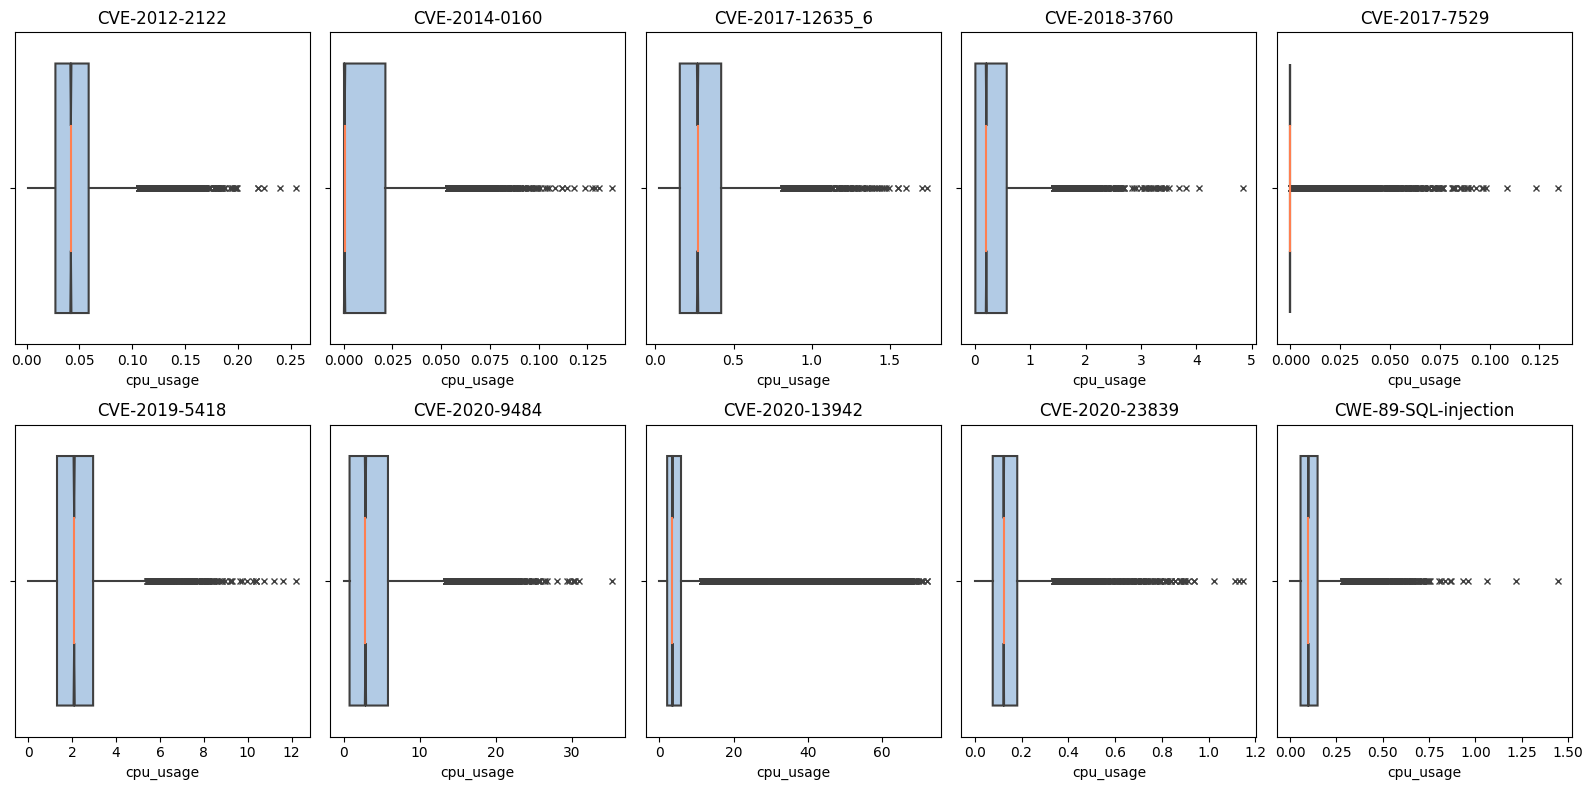

In [42]:
# Boxplot CPU-Usage Train Data 
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.boxplot(data=train[train['scenario']=='CVE-2012-2122'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.boxplot(data=train[train['scenario']=='CVE-2014-0160'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')


sns.boxplot(data=train[train['scenario']=='CVE-2017-12635_6'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')

sns.boxplot(data=train[train['scenario']=='CVE-2018-3760'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')


sns.boxplot(data=train[train['scenario']=='CVE-2017-7529'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')


sns.boxplot(data=train[train['scenario']=='CVE-2019-5418'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.boxplot(data=train[train['scenario']=='CVE-2020-9484'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.boxplot(data=train[train['scenario']=='CVE-2020-13942'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.boxplot(data=train[train['scenario']=='CVE-2020-23839'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')


sns.boxplot(data=train[train['scenario']=='CWE-89-SQL-injection'], x='cpu_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')


fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/BOXPLOT_cpu_usage_sceanrios_train.png")

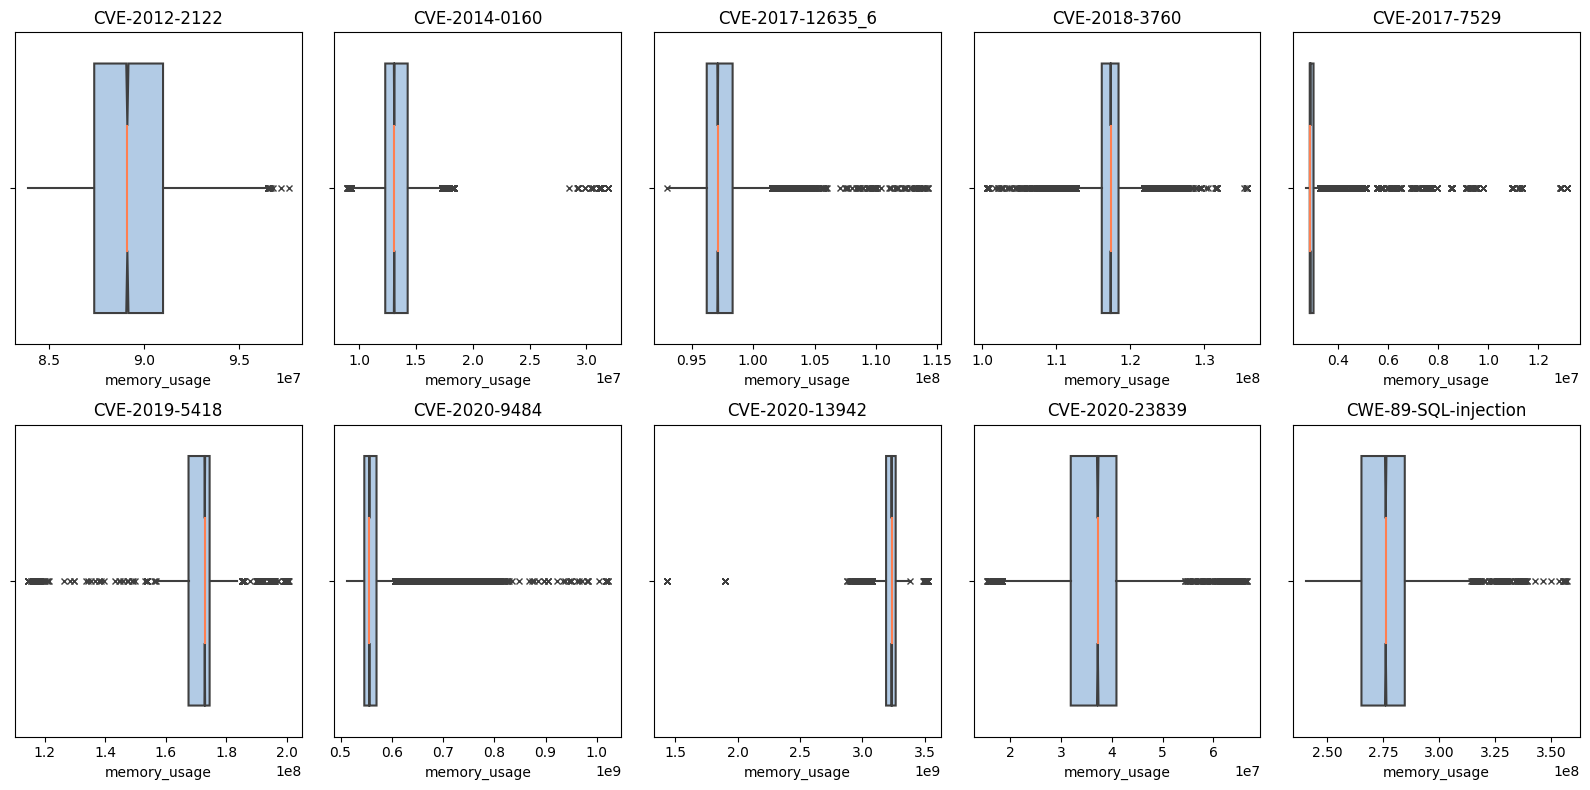

In [43]:
# Boxplot Memory-Usage Train Data 
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.boxplot(data=train[train['scenario']=='CVE-2012-2122'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.boxplot(data=train[train['scenario']=='CVE-2014-0160'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.boxplot(data=train[train['scenario']=='CVE-2017-12635_6'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')

sns.boxplot(data=train[train['scenario']=='CVE-2018-3760'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')

sns.boxplot(data=train[train['scenario']=='CVE-2017-7529'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')

sns.boxplot(data=train[train['scenario']=='CVE-2019-5418'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.boxplot(data=train[train['scenario']=='CVE-2020-9484'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.boxplot(data=train[train['scenario']=='CVE-2020-13942'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.boxplot(data=train[train['scenario']=='CVE-2020-23839'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')

sns.boxplot(data=train[train['scenario']=='CWE-89-SQL-injection'], x='memory_usage',
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')

fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/BOXPLOT_memory_usage_sceanrios_train.png")

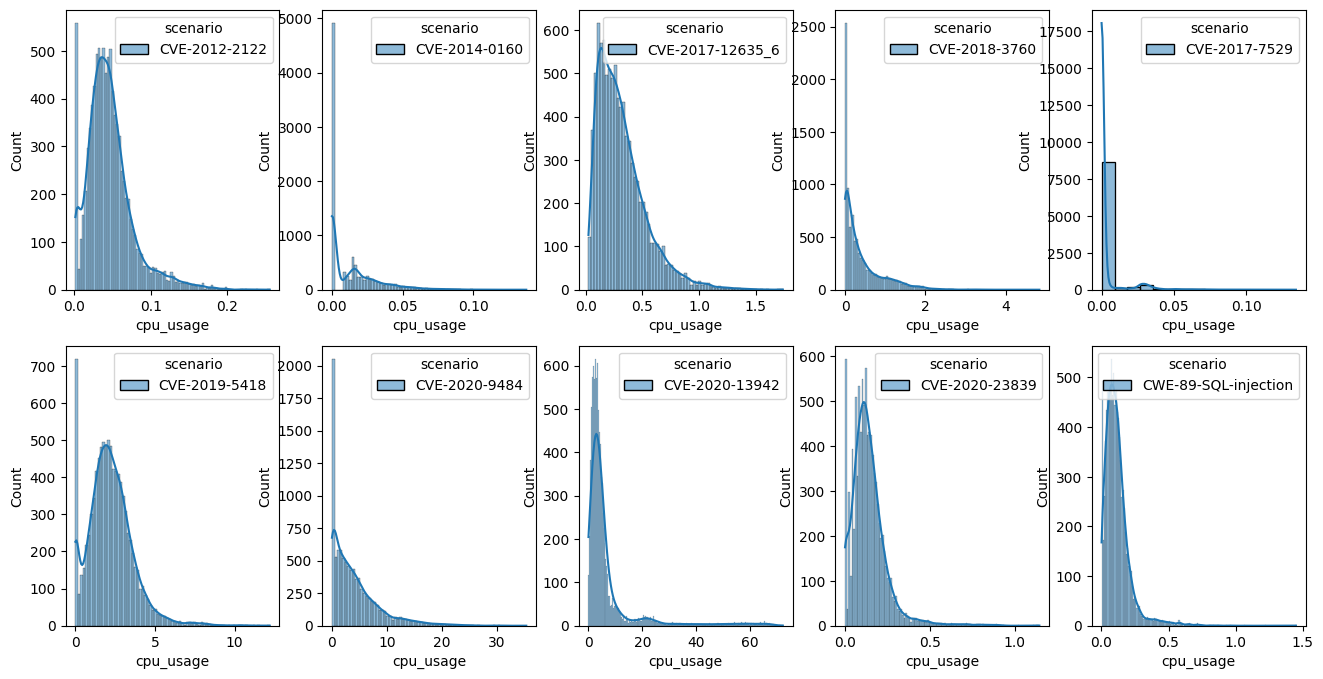

In [44]:
#  Histplot CPU Usage Train data
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.histplot(data=train[train['scenario']=='CVE-2012-2122'], x='cpu_usage', kde=True, hue='scenario', ax=axes[0,0])
sns.histplot(data=train[train['scenario']=='CVE-2014-0160'], x='cpu_usage', kde=True, hue='scenario',ax=axes[0,1])
sns.histplot(data=train[train['scenario']=='CVE-2017-12635_6'], x='cpu_usage', kde=True, hue='scenario',ax=axes[0,2])
sns.histplot(data=train[train['scenario']=='CVE-2018-3760'], x='cpu_usage', kde=True, hue='scenario',ax=axes[0,3])
sns.histplot(data=train[train['scenario']=='CVE-2017-7529'], x='cpu_usage', kde=True, hue='scenario',ax=axes[0,4])
sns.histplot(data=train[train['scenario']=='CVE-2019-5418'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,0])
sns.histplot(data=train[train['scenario']=='CVE-2020-9484'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,1])
sns.histplot(data=train[train['scenario']=='CVE-2020-13942'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,2])
sns.histplot(data=train[train['scenario']=='CVE-2020-23839'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,3])
sns.histplot(data=train[train['scenario']=='CWE-89-SQL-injection'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,4])
#fig.suptitle("CPU usage across the different scenarios in the training data")
plt.show()
fig.savefig("../../src/plots/EDA/Histplots_cpu_usage_sceanrios_train.png")


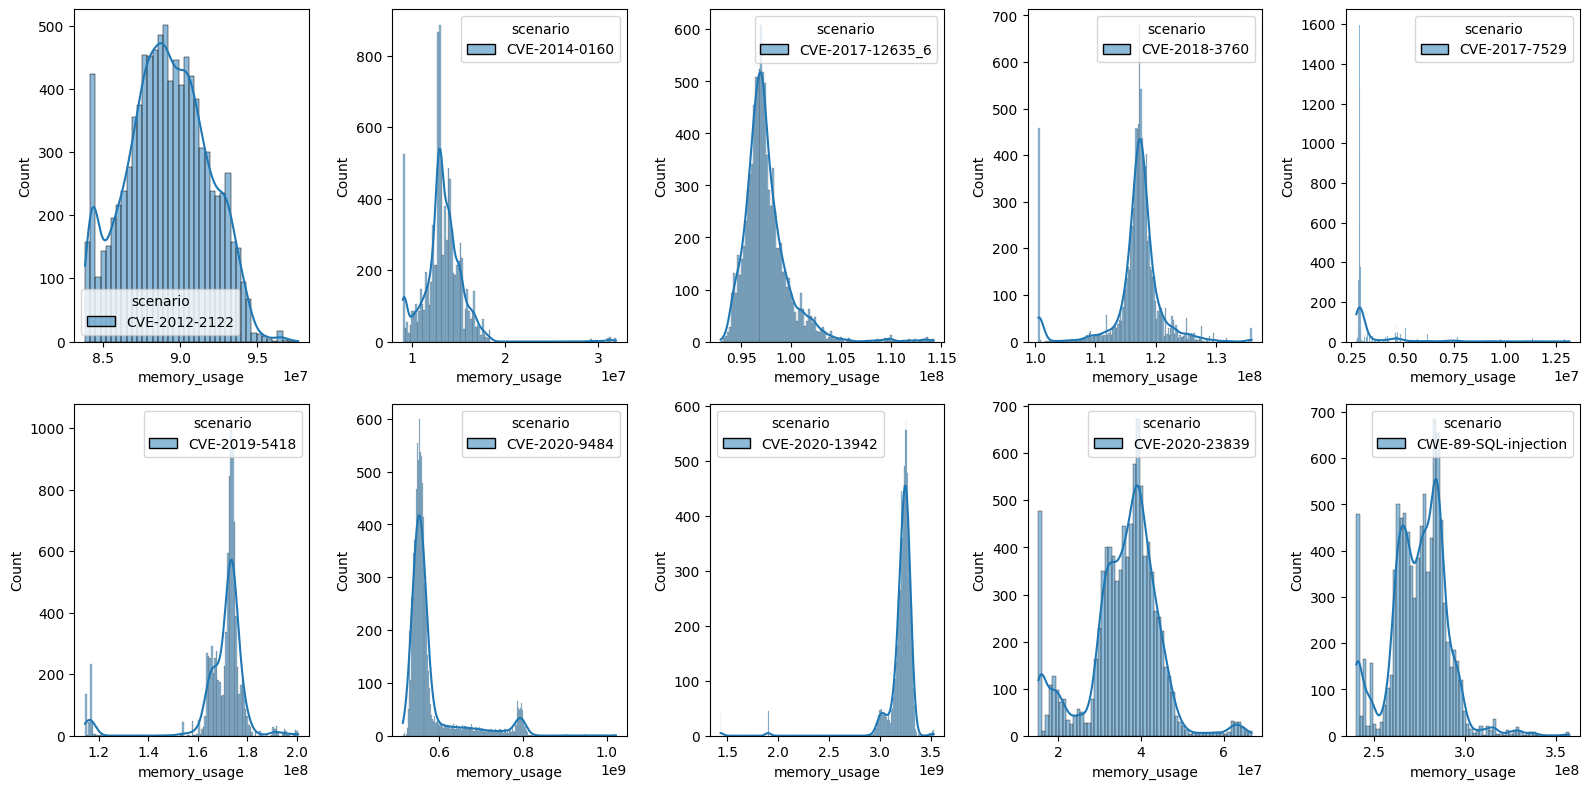

In [45]:
# Histplots Memory Usage Train Data
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.histplot(data=train[train['scenario']=='CVE-2012-2122'], x='memory_usage', kde=True, hue='scenario', ax=axes[0,0])
sns.histplot(data=train[train['scenario']=='CVE-2014-0160'], x='memory_usage', kde=True, hue='scenario',ax=axes[0,1])
sns.histplot(data=train[train['scenario']=='CVE-2017-12635_6'], x='memory_usage', kde=True, hue='scenario',ax=axes[0,2])
sns.histplot(data=train[train['scenario']=='CVE-2018-3760'], x='memory_usage', kde=True, hue='scenario',ax=axes[0,3])
sns.histplot(data=train[train['scenario']=='CVE-2017-7529'], x='memory_usage', kde=True, hue='scenario',ax=axes[0,4])
sns.histplot(data=train[train['scenario']=='CVE-2019-5418'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,0])
sns.histplot(data=train[train['scenario']=='CVE-2020-9484'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,1])
sns.histplot(data=train[train['scenario']=='CVE-2020-13942'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,2])
sns.histplot(data=train[train['scenario']=='CVE-2020-23839'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,3])
sns.histplot(data=train[train['scenario']=='CWE-89-SQL-injection'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,4])
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/Histplots_memory_usage_sceanrios_train.png")

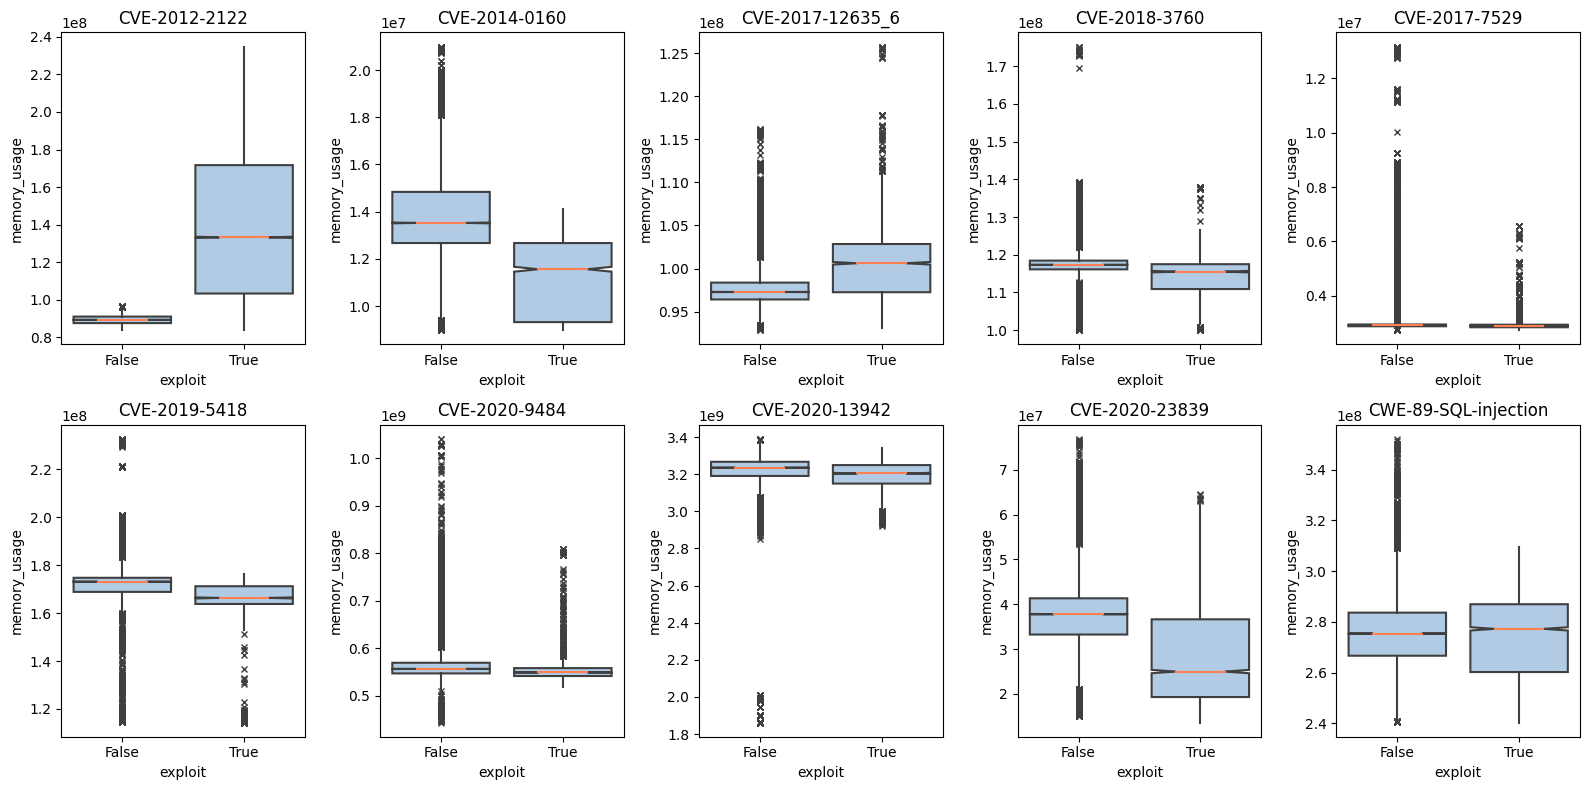

In [46]:
# Boxplot Memory-Usage Test Data 
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.boxplot(data=test[test['scenario']=='CVE-2012-2122'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.boxplot(data=test[test['scenario']=='CVE-2014-0160'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.boxplot(data=test[test['scenario']=='CVE-2017-12635_6'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')


sns.boxplot(data=test[test['scenario']=='CVE-2018-3760'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')

sns.boxplot(data=test[test['scenario']=='CVE-2017-7529'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')

sns.boxplot(data=test[test['scenario']=='CVE-2019-5418'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.boxplot(data=test[test['scenario']=='CVE-2020-9484'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.boxplot(data=test[test['scenario']=='CVE-2020-13942'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.boxplot(data=test[test['scenario']=='CVE-2020-23839'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')

sns.boxplot(data=test[test['scenario']=='CWE-89-SQL-injection'],y='memory_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')

fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/BOXPLOTS_memory_usage_sceanrios_test.png")


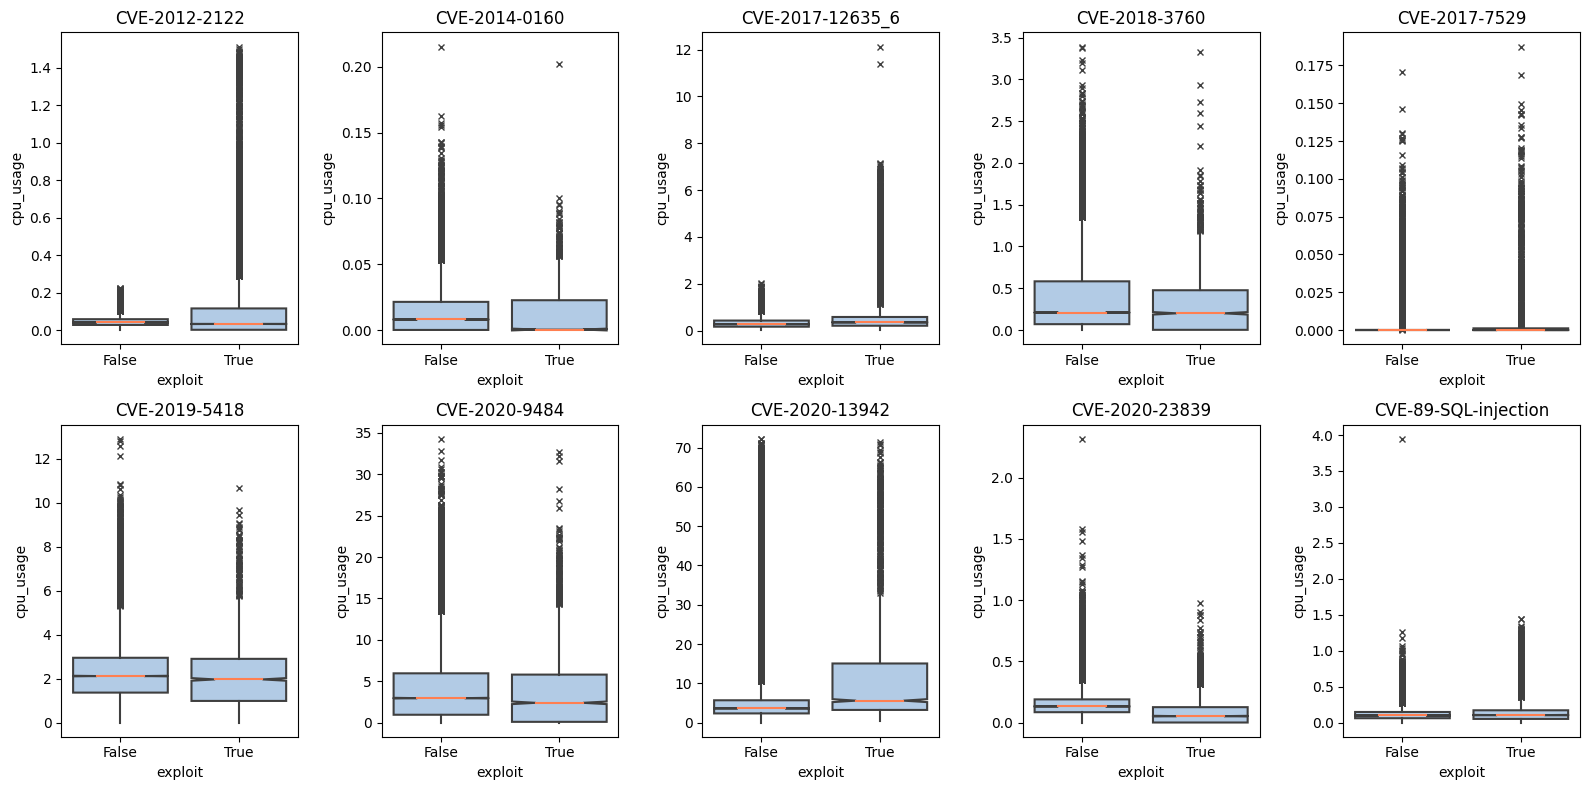

In [47]:
# Boxplot CPU-Usage Test Data 
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.boxplot(data=test[test['scenario']=='CVE-2012-2122'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.boxplot(data=test[test['scenario']=='CVE-2014-0160'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.boxplot(data=test[test['scenario']=='CVE-2017-12635_6'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')


sns.boxplot(data=test[test['scenario']=='CVE-2018-3760'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')


sns.boxplot(data=test[test['scenario']=='CVE-2017-7529'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')

sns.boxplot(data=test[test['scenario']=='CVE-2019-5418'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.boxplot(data=test[test['scenario']=='CVE-2020-9484'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.boxplot(data=test[test['scenario']=='CVE-2020-13942'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.boxplot(data=test[test['scenario']=='CVE-2020-23839'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')


sns.boxplot(data=test[test['scenario']=='CWE-89-SQL-injection'],y='cpu_usage',
    orient="v", 
    x='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,4])
axes[1,4].title.set_text('CVE-89-SQL-injection')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/BOXPLOTS_cpu_usage_sceanrios_test.png")

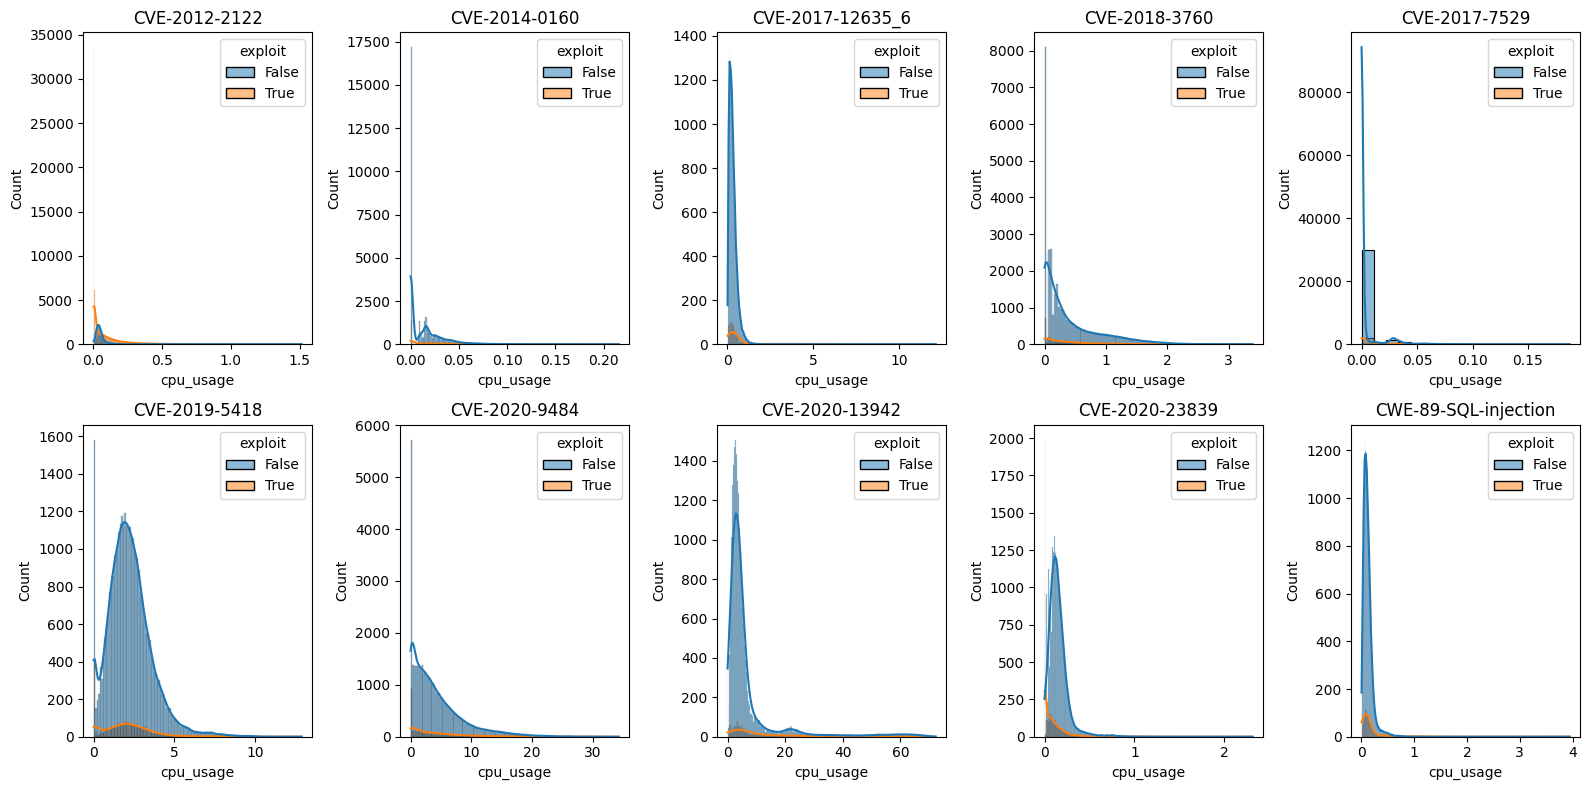

In [48]:
# Histplots CPU Usage
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.histplot(data=test[test['scenario']=='CVE-2012-2122'], x='cpu_usage', kde=True, hue='exploit', ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.histplot(data=test[test['scenario']=='CVE-2014-0160'], x='cpu_usage', kde=True, hue='exploit',ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.histplot(data=test[test['scenario']=='CVE-2017-12635_6'], x='cpu_usage', kde=True, hue='exploit',ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')

sns.histplot(data=test[test['scenario']=='CVE-2018-3760'], x='cpu_usage', kde=True, hue='exploit',ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')

sns.histplot(data=test[test['scenario']=='CVE-2017-7529'], x='cpu_usage', kde=True, hue='exploit', ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')

sns.histplot(data=test[test['scenario']=='CVE-2019-5418'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.histplot(data=test[test['scenario']=='CVE-2020-9484'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.histplot(data=test[test['scenario']=='CVE-2020-13942'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.histplot(data=test[test['scenario']=='CVE-2020-23839'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')

sns.histplot(data=test[test['scenario']=='CWE-89-SQL-injection'], x='cpu_usage', kde=True, hue='exploit', ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')


fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/Histplots_cpu_usage_sceanrios_test.png")

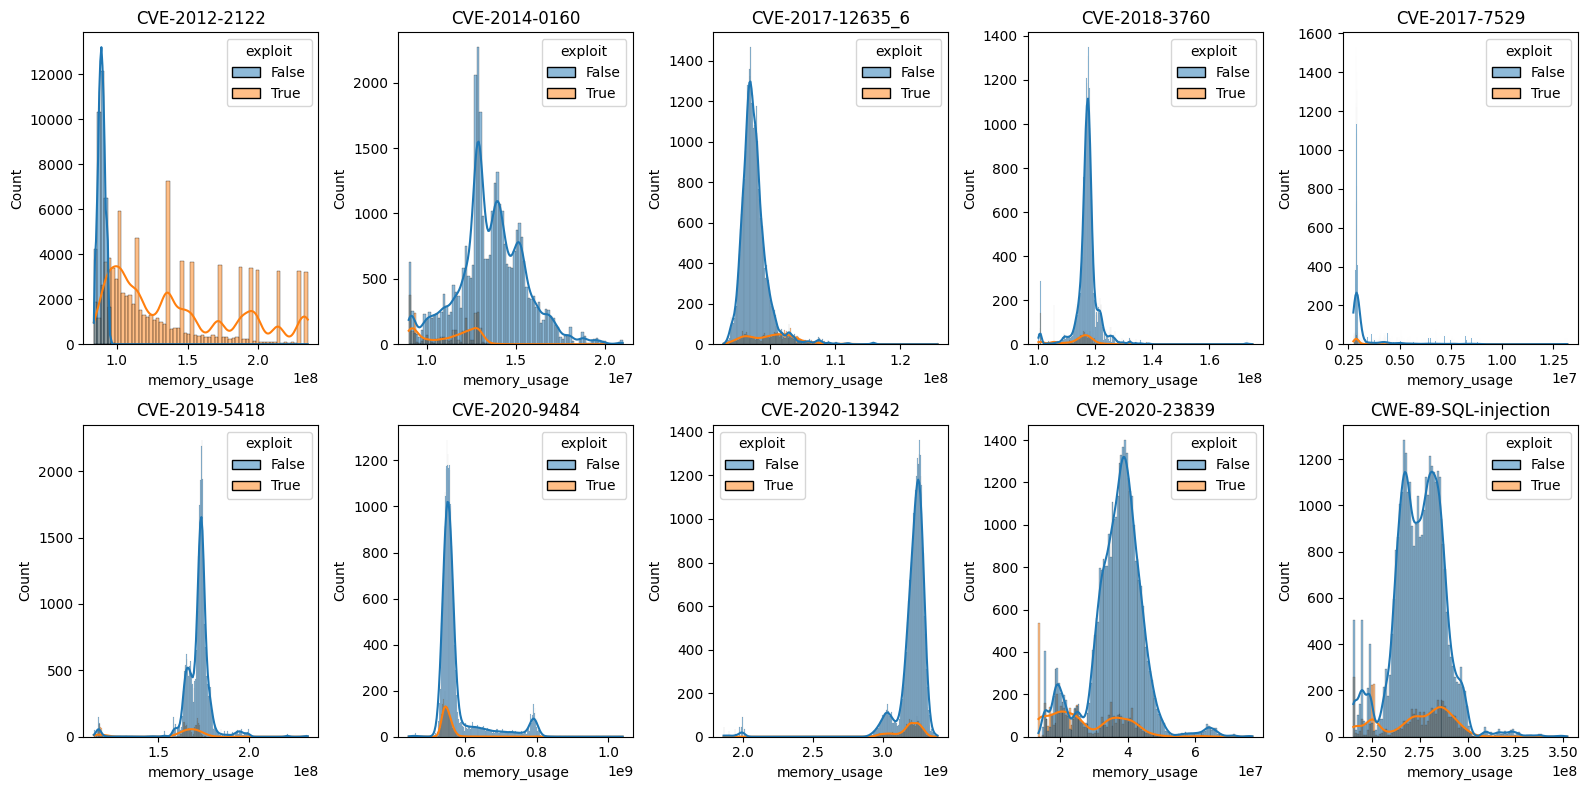

In [49]:
# Histplots Memory Usage 
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.histplot(data=test[test['scenario']=='CVE-2012-2122'], x='memory_usage', kde=True, hue='exploit', ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.histplot(data=test[test['scenario']=='CVE-2014-0160'], x='memory_usage', kde=True, hue='exploit',ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.histplot(data=test[test['scenario']=='CVE-2017-12635_6'], x='memory_usage', kde=True, hue='exploit',ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')

sns.histplot(data=test[test['scenario']=='CVE-2018-3760'], x='memory_usage', kde=True, hue='exploit',ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')

sns.histplot(data=test[test['scenario']=='CVE-2017-7529'], x='memory_usage', kde=True, hue='exploit', ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')

sns.histplot(data=test[test['scenario']=='CVE-2019-5418'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.histplot(data=test[test['scenario']=='CVE-2020-9484'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.histplot(data=test[test['scenario']=='CVE-2020-13942'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.histplot(data=test[test['scenario']=='CVE-2020-23839'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')

sns.histplot(data=test[test['scenario']=='CWE-89-SQL-injection'], x='memory_usage', kde=True, hue='exploit', ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/Histplots_memory_usage_sceanrios_test.png")

## Correlations 

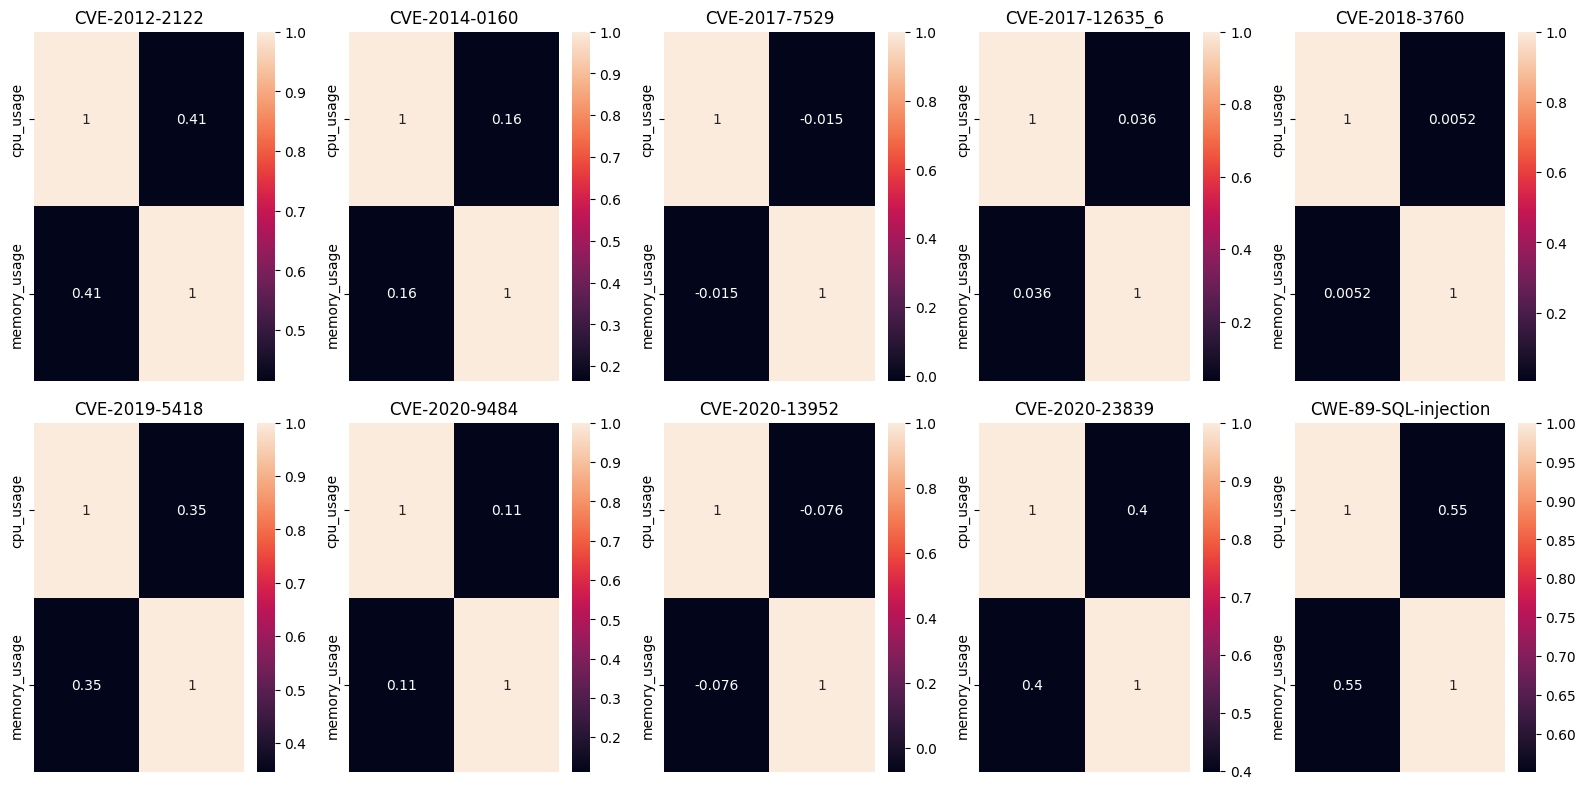

In [50]:
# Train data
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
correlations = []
for i in range(0,len(scenarios)):
    data=train[train['scenario']==scenarios[i]][['cpu_usage', 'memory_usage']].corr()
    correlations.append(data)
sns.heatmap(correlations[0], annot=True, xticklabels=False, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')
sns.heatmap(correlations[1], annot=True, xticklabels=False, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')
sns.heatmap(correlations[2], annot=True, xticklabels=False, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-7529')
sns.heatmap(correlations[3], annot=True, xticklabels=False, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2017-12635_6')
sns.heatmap(correlations[4], annot=True, xticklabels=False, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2018-3760')
sns.heatmap(correlations[5], annot=True, xticklabels=False, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')
sns.heatmap(correlations[6], annot=True, xticklabels=False, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')
sns.heatmap(correlations[7], annot=True, xticklabels=False, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13952')
sns.heatmap(correlations[8], annot=True, xticklabels=False, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')
sns.heatmap(correlations[9], annot=True, xticklabels=False, ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/CORRELATION_Train.png")

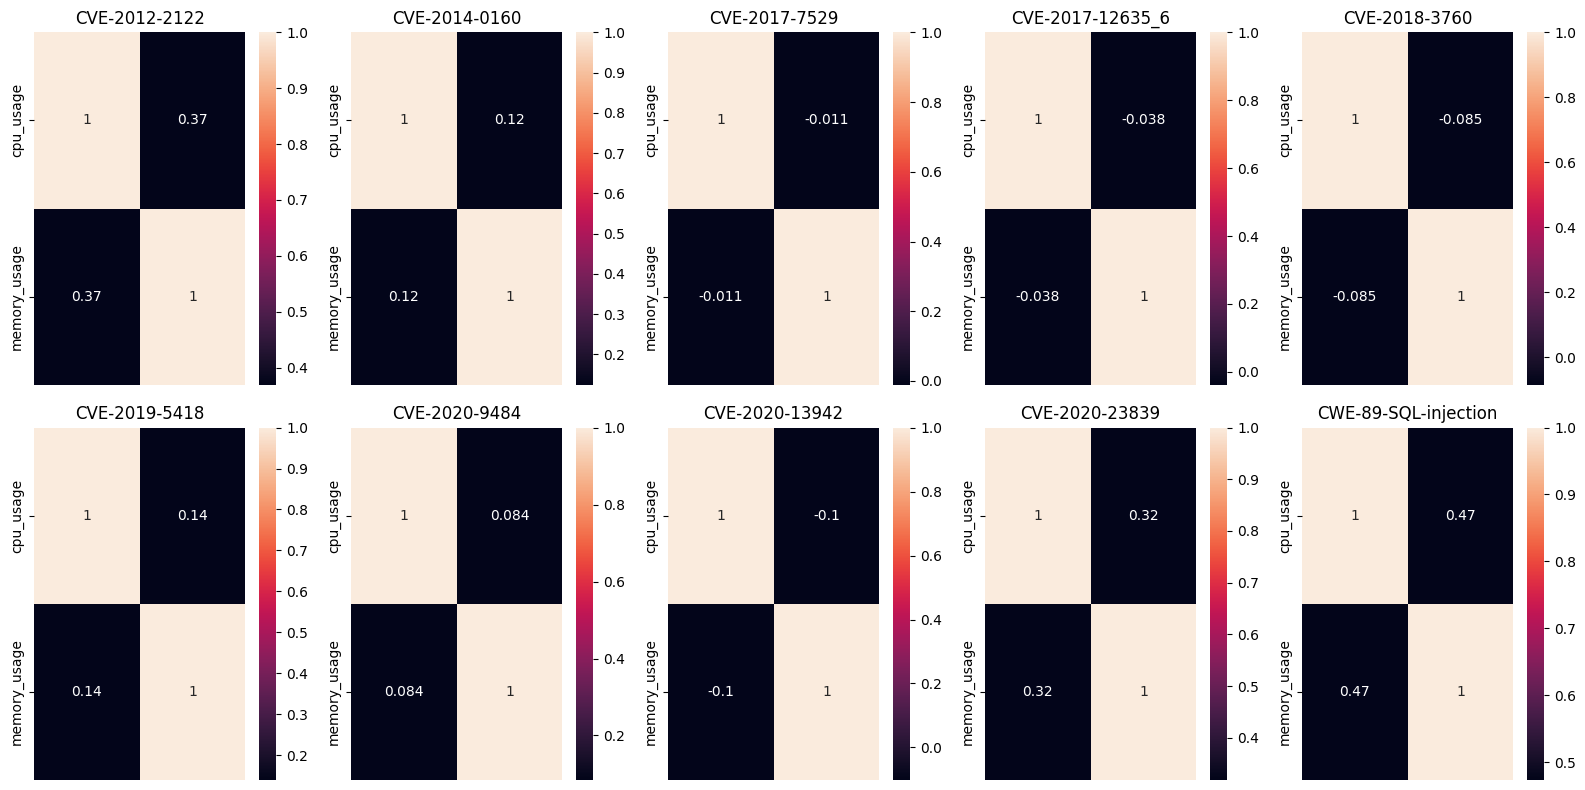

In [51]:
# Test data, exploit = False
test_normal = test[test['exploit']!=True] 
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
correlations = []
for i in range(0,len(scenarios)):
    data=test_normal[test_normal['scenario']==scenarios[i]][['cpu_usage', 'memory_usage']].corr()
    correlations.append(data)
sns.heatmap(correlations[0], annot=True, xticklabels=False, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')
sns.heatmap(correlations[1], annot=True, xticklabels=False, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')
sns.heatmap(correlations[2], annot=True, xticklabels=False, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-7529')
sns.heatmap(correlations[3], annot=True, xticklabels=False, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2017-12635_6')
sns.heatmap(correlations[4], annot=True, xticklabels=False, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2018-3760')
sns.heatmap(correlations[5], annot=True, xticklabels=False, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')
sns.heatmap(correlations[6], annot=True, xticklabels=False, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')
sns.heatmap(correlations[7], annot=True, xticklabels=False, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')
sns.heatmap(correlations[8], annot=True, xticklabels=False, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')
sns.heatmap(correlations[9], annot=True, xticklabels=False, ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/CORRELATION_Test_normal.png")

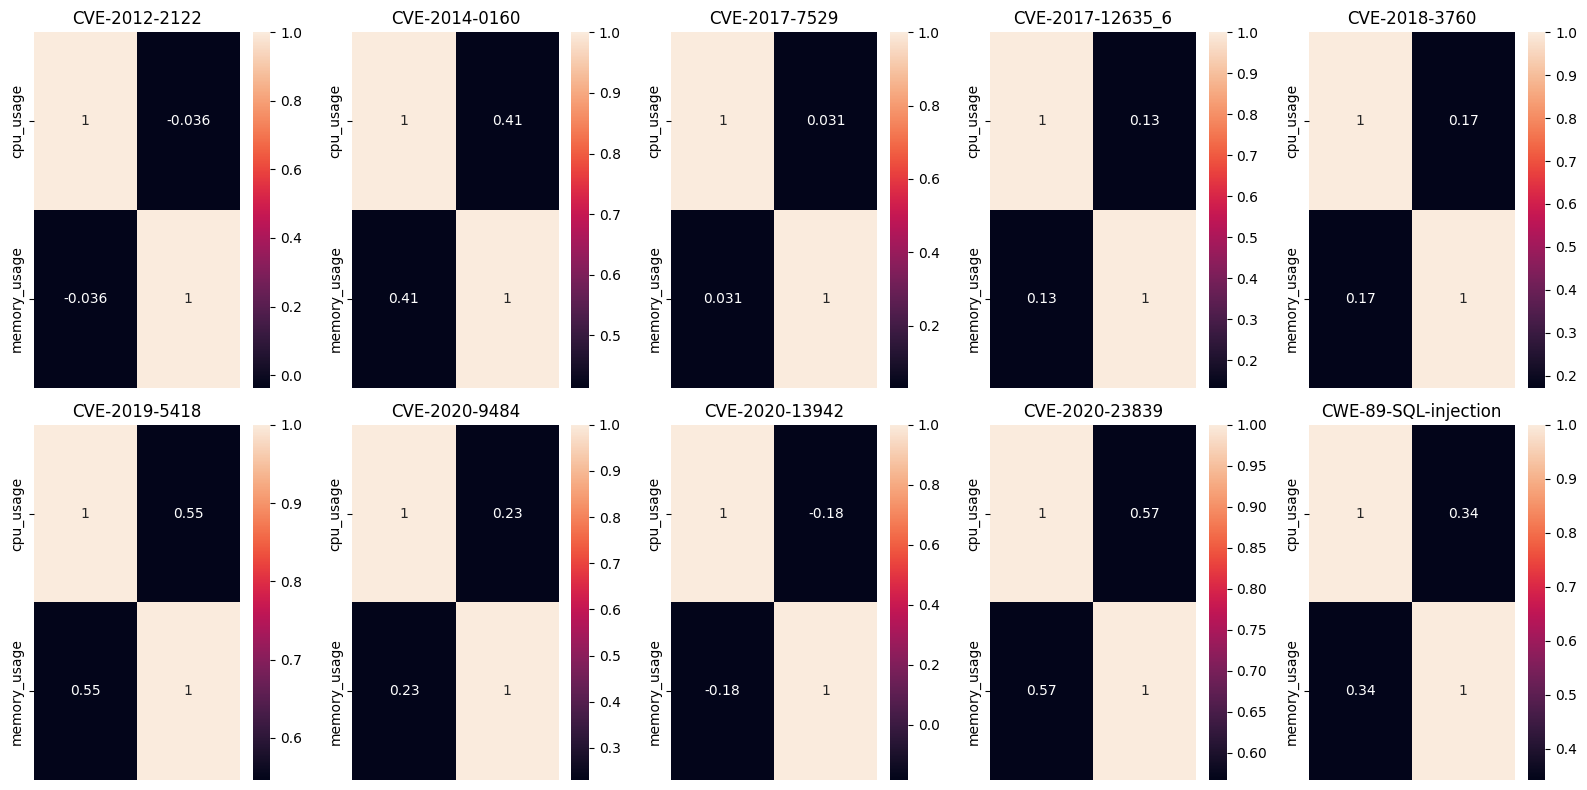

In [52]:
# Test data, exploit = True
test_attack = test[test['exploit']==True] 
fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
correlations = []
for i in range(0,len(scenarios)):
    data=test_attack[test_attack['scenario']==scenarios[i]][['cpu_usage', 'memory_usage']].corr()
    correlations.append(data)
sns.heatmap(correlations[0], xticklabels=False, annot=True, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')
sns.heatmap(correlations[1], annot=True, xticklabels=False, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')
sns.heatmap(correlations[2], annot=True, xticklabels=False, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-7529')
sns.heatmap(correlations[3], annot=True, xticklabels=False, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2017-12635_6')
sns.heatmap(correlations[4], annot=True, xticklabels=False, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2018-3760')
sns.heatmap(correlations[5], annot=True, xticklabels=False, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')
sns.heatmap(correlations[6], annot=True, xticklabels=False, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')
sns.heatmap(correlations[7], annot=True, xticklabels=False, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')
sns.heatmap(correlations[8], annot=True, xticklabels=False, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')
sns.heatmap(correlations[9], annot=True, xticklabels=False, ax=axes[1,4])
axes[1,4].title.set_text('CWE-89-SQL-injection')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/CORRELATION_Test_attack.png")

## Outlier Truncation

We perform outlier truncation for each scenario in the test data set but only for exploit == False.

In [80]:
no_outliers = {}
for i in range(0,len(scenarios)):
    normal = TEST[scenarios[i]][TEST[scenarios[i]]['exploit']==False]
    attack = TEST[scenarios[i]][TEST[scenarios[i]]['exploit']!=False]
    # chose only cpu_usage and memory_usage
    normal = select_columns_outlier_truncate(normal)
    attack = select_columns_outlier_truncate(attack)
    # calculate IQR for each scenario
    Q1 = normal.quantile(0.25)
    Q3 = normal.quantile(0.75)
    IQR = Q3 - Q1
    normal = normal[~((normal< (Q1 - 1.5 * IQR)) |(normal > (Q3 + 1.5 * IQR))).any(axis=1)]
    no_outliers[scenarios[i]] = pd.concat([normal, attack])


In [81]:
# get all scenarios in one data set at the end
no_outliers_test = []
for key in no_outliers.keys():
    no_outliers[key]['scenario'] = key
    temp_df = no_outliers[key]
    no_outliers_test.append(temp_df)
no_outliers['ALL'] = pd.concat(no_outliers_test)

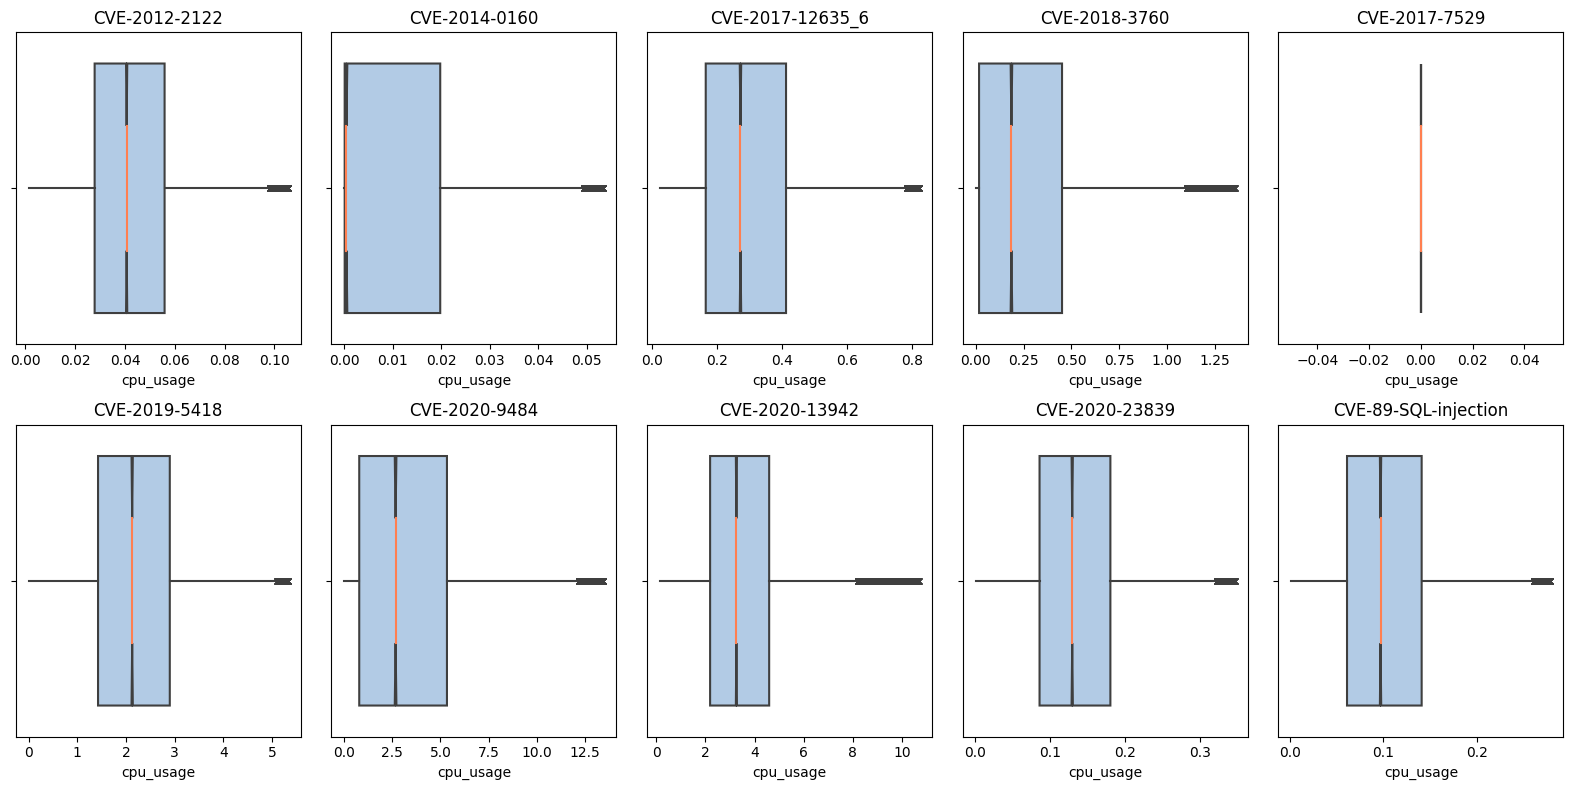

In [93]:
# Check Boxplots again CPU Usage
mask = (test['exploit']==False)

fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.boxplot(data=test[(test['scenario']=='CVE-2012-2122') & mask], x='cpu_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.boxplot(data=test[(test['scenario']=='CVE-2014-0160') & mask],x='cpu_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.boxplot(data=test[(test['scenario']=='CVE-2017-12635_6') & mask],x='cpu_usage',
    orient="v", 
   #y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')


sns.boxplot(data=test[(test['scenario']=='CVE-2018-3760') & mask],x='cpu_usage',
    orient="v", 
  #  y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')


sns.boxplot(data=test[(test['scenario']=='CVE-2017-7529') & mask],x='cpu_usage',
    orient="v", 
  #  y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')

sns.boxplot(data=test[(test['scenario']=='CVE-2019-5418') & mask],x='cpu_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.boxplot(data=test[(test['scenario']=='CVE-2020-9484') & mask],x='cpu_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.boxplot(data=test[(test['scenario']=='CVE-2020-13942') & mask],x='cpu_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.boxplot(data=test[(test['scenario']=='CVE-2020-23839') & mask],x='cpu_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')


sns.boxplot(data=test[(test['scenario']=='CWE-89-SQL-injection') & mask],x='cpu_usage',
    orient="v", 
  #  y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,4])
axes[1,4].title.set_text('CVE-89-SQL-injection')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/BOXPLOTS_NO_OUTLIERS_cpu_usage_sceanrios_test.png")


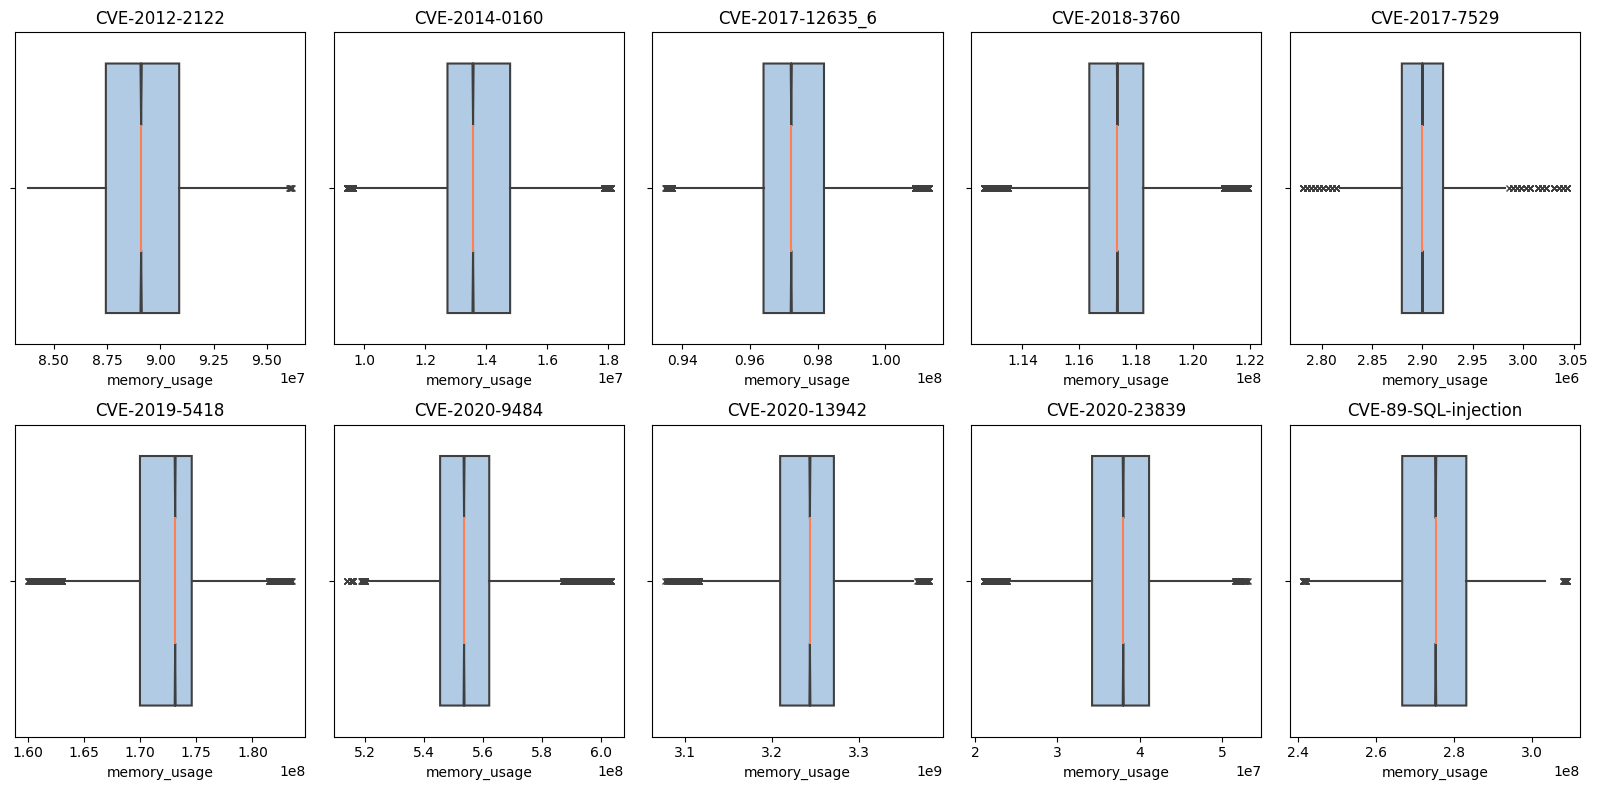

In [98]:
# Check Boxplots again CPU Usage
mask = (test['exploit']==False)

fig, axes  = plt.subplots(2,5, sharex=False, figsize=(16,8))
sns.boxplot(data=test[(test['scenario']=='CVE-2012-2122') & mask], x='memory_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.boxplot(data=test[(test['scenario']=='CVE-2014-0160') & mask],x='memory_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.boxplot(data=test[(test['scenario']=='CVE-2017-12635_6') & mask],x='memory_usage',
    orient="v", 
   #y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')


sns.boxplot(data=test[(test['scenario']=='CVE-2018-3760') & mask],x='memory_usage',
    orient="v", 
  #  y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')


sns.boxplot(data=test[(test['scenario']=='CVE-2017-7529') & mask],x='memory_usage',
    orient="v", 
  #  y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[0,4])
axes[0,4].title.set_text('CVE-2017-7529')

sns.boxplot(data=test[(test['scenario']=='CVE-2019-5418') & mask],x='memory_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.boxplot(data=test[(test['scenario']=='CVE-2020-9484') & mask],x='memory_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.boxplot(data=test[(test['scenario']=='CVE-2020-13942') & mask],x='memory_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.boxplot(data=test[(test['scenario']=='CVE-2020-23839') & mask],x='memory_usage',
    orient="v", 
   # y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')


sns.boxplot(data=test[(test['scenario']=='CWE-89-SQL-injection') & mask],x='memory_usage',
    orient="v", 
  #  y='exploit',
    hue_order=["False", "True"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}, ax=axes[1,4])
axes[1,4].title.set_text('CVE-89-SQL-injection')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/EDA/BOXPLOTS_NO_OUTLIERS_memory_usage_sceanrios_test.png")


## Time Series Data 

- When was the exact attack happening? 